<h1 style="color:blue; font-size:40px;"><strong><em>Revenue Management of Superstore Sales Data</em></strong></h1>
[Data Source](https://www.kaggle.com/code/adityadangwal011/superstore-sales-data-analysis)

<h3 style="color:blue; font-size:25px;"><strong><em>Section 1: Load extensive list of libraries</em></strong></h3>

In [974]:
# Data Importing and mauplation
import pandas as pd # 	Data manipulation (CSV, Excel, SQL, JSON, etc.)cCSV, Excel, SQL, JSON, Parquet, etc.Contains visualization as well. 
import numpy as np #Numerical data manipulation. Arrays, matrices
!pip install openpyxl
import openpyxl # Excel file manipulation (XLSX). Excel files (XLSX)
!pip install xlrd xlwt
import xlrd #Excel file manipulation (XLS format).Excel files (XLS)
!pip install pyodbc
import pyodbc #SQL database interaction. SQL databases (MySQL, SQL Server, etc.)
!pip install sqlalchemy
from sqlalchemy import create_engine #SQL database interaction (ORM). SQL databases
import csv # Reading and writing CSV files. CSV files
!pip install requests
import requests #Fetch data from APIs or websites. JSON, XML, HTML
!pip install dask
import dask.dataframe as dd #Parallel computing for large data. CSV, Parquet, HDF5, etc.
!pip install beautifulsoup4
from bs4 import BeautifulSoup #Web scraping (HTML/XML).HTML, XML
import requests # Fetch data from APIs or websites. JSON, XML, HTML
!pip install petl
import petl as etl #ETL (Extract, Transform, Load). CSV, Excel, JSON, SQL
#Visualization 
import matplotlib.pyplot as plt #Basic plots and charts
import seaborn as sns #Statistical graphics
import plotly.express as px #Interactive visualizations



<h3 style="color:blue; font-size:25px;"><strong><em>Section 2: Load Data file and Understand the Data</em></strong></h3>

In [976]:
df = pd.read_csv(r'cap_data\ss_data.csv')
# df = pd.read_excel('file.xlsx')
# df = pd.read_json('file.json')
# import sqlite3 #Reading from a Database (SQL)
# #Connect to the SQLite database
# conn = sqlite3.connect('database.db') #For reading from SQLite databases.
# # Query data into a DataFrame
# df = pd.read_sql_query("SELECT * FROM table_name", conn)
#  #For reading JSON data into a Python object.
#  #For reading text files and processing line-by-line.open()json.load()

In [977]:
df.shape

(9800, 18)

In [978]:
df.head(2)
df.tail(2)
df.sample(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
6648,6649,US-2018-124779,08/09/2018,11/09/2018,First Class,BF-11020,Barry Französisch,Corporate,United States,Arlington,Texas,76017.0,Central,OFF-BI-10002429,Office Supplies,Binders,"Premier Elliptical Ring Binder, Black",42.616
8795,8796,CA-2015-162992,19/12/2015,21/12/2015,First Class,BP-11095,Bart Pistole,Corporate,United States,Los Angeles,California,90008.0,West,TEC-PH-10002085,Technology,Phones,Clarity 53712,211.168


In [979]:
df.describe()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [980]:
# Group columns based on common naming patterns
order_cols = [col for col in df.columns if 'order' in col.lower() or 'date' in col.lower()]
customer_cols = [col for col in df.columns if 'customer' in col.lower() or 'segment' in col.lower()]
location_cols = [col for col in df.columns if col.lower() in ['city', 'state', 'region', 'country']]
product_cols = [col for col in df.columns if 'product' in col.lower() or col.lower() in ['category', 'sub-category']]
sales_cols = [col for col in df.columns if any(s in col.lower() for s in ['sales', 'profit', 'discount', 'quantity'])]

# Combine and deduplicate
all_grouped_cols = set(order_cols + customer_cols + location_cols + product_cols + sales_cols)
other_cols = [col for col in df.columns if col not in all_grouped_cols]

# Display grouped columns
print("Order Columns:", order_cols)
print("Customer Columns:", customer_cols)
print("Location Columns:", location_cols)
print("Product Columns:", product_cols)
print("Sales Columns:", sales_cols)
print("Other / Unclassified Columns:", other_cols)

Order Columns: ['Order ID', 'Order Date', 'Ship Date']
Customer Columns: ['Customer ID', 'Customer Name', 'Segment']
Location Columns: ['Country', 'City', 'State', 'Region']
Product Columns: ['Product ID', 'Category', 'Sub-Category', 'Product Name']
Sales Columns: ['Sales']
Other / Unclassified Columns: ['Row ID', 'Ship Mode', 'Postal Code']


In [981]:
df['Customer Name'].unique()
df['Customer Name'].nunique()
df['Customer Name'].value_counts() #Total numbe rof customer 793


Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donnell       1
Name: count, Length: 793, dtype: int64

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

<h3 style="color:blue; font-size:20px;"><strong><em>Fix or Convert Data types</em></strong></h3>

In [984]:
##Fix or Convert Data types
# Converts object type to a proper datetime64 type. error ='coerce converts dates; bad values to NaT
df['Order Date'] =pd.to_datetime(df['Order Date'], errors ='coerce')
df['Ship Date'] =pd.to_datetime(df['Ship Date'], errors ='coerce')
# Identify all object/string type and convert to category type
object_cols =df.select_dtypes(include ='object').columns
df[object_cols] =df[object_cols].astype('category')

In [985]:
df.dtypes

Row ID                    int64
Order ID               category
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID            category
Customer Name          category
Segment                category
Country                category
City                   category
State                  category
Postal Code             float64
Region                 category
Product ID             category
Category               category
Sub-Category           category
Product Name           category
Sales                   float64
dtype: object

<h3 style="color:blue; font-size:20px;"><strong><em>Identify Duplicate Rows and Columns and Remove them, No duplicate rows found </em></strong></h3>

In [987]:
df.duplicated().any()

False

<h3 style="color:blue; font-size:20px;"><strong><em>Convert text to lower case, strip leading and trailing spaces, Remove Special Characters</em></strong></h3>

In [989]:
df = df.apply(lambda x: x.str.lower().str.strip().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True) if x.dtype == "category" else x)


<h3 style="color:blue; font-size:20px;"><strong><em>Handling missing values and checking for date formats. Dropped rows (11) with NaN as seen in the 'Postal Code'column</em></strong></h3>

In [991]:
import pandas as pd

# Ensure both columns are in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Fill only NaN values in 'Ship Date' with 'Order Date' + 2 days
df['Ship Date'] = df['Ship Date'].fillna(df['Order Date'] + pd.Timedelta(days=2))
df['Order Date'] = df['Order Date'].fillna(df['Ship Date'] + pd.Timedelta(days=2))


In [992]:
# Count null values per column
null_counts = df.isnull().sum()

# # Display columns with their null value counts
print("Null values per column:\n")
print(null_counts[null_counts > 0].sort_values(ascending=False))

df = df.dropna(subset =['Postal Code']) # drops rows where postal code is NaN
df = df.dropna(subset =['Postal Code']) # drops rows where postal code is NaN
null_counts
df[df.isnull().any(axis=1)] #locate rows with any null values. No rows with all null values found
df.loc[:,df.isnull().any()] #locate columns with any null values. 
df = df.dropna(subset =['Postal Code']) # drops rows where postal code is NaN


Null values per column:

Order Date     4702
Ship Date      4702
Postal Code      11
dtype: int64


In [993]:
df.shape[0] # len(df)
df.shape[1] #len(df.columns)
df.shape

(9789, 18)

In [994]:
# Check for empty strings or invalid formats. Find rows where either Order Date or Ship Date is an empty string or missing
## BEFORE datetime conversion
df_invalid_row = df[(df['Order Date'] == '') | (df['Ship Date'] == '')]
print("No rows are bank or missing values as shown in the table output")
df_invalid_row

No rows are bank or missing values as shown in the table output


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


<h3 style="color:blue; font-size:20px;"><strong><em>Identify Outliers for the Sales Column using Z score, IQR, Box Plot and Scatter Plot. Remove outliers/use averages</em></strong</em></strong></h3>

In [996]:
#zscore: Shows 122 rows as outliers 
from scipy.stats import zscore
z_score = zscore(df['Sales'])
outliers = df[abs(z_score)>3]
outliers.shape


(122, 18)

In [997]:
#Interquartile Range. Outliers are data points that fall below Q1- 1.5*IQR or above Q3+1.5*IQR. Shows 1145 rows as outliers. 
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
Outliers_IQR = df[(df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR))]
Outliers_IQR.shape

(1141, 18)

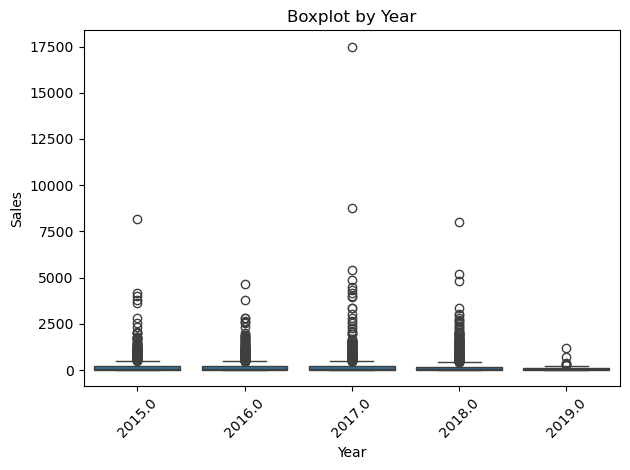

In [998]:
#BoxPlot
df['Year'] = pd.to_datetime(df['Order Date'], dayfirst=True).dt.year
sns.boxplot(x='Year', y='Sales', data=df)
plt.title('Boxplot by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


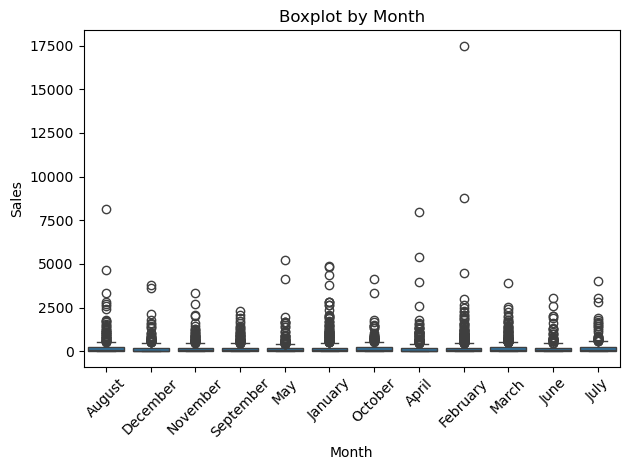

In [999]:
df['Month'] = pd.to_datetime(df['Order Date'], dayfirst=True).dt.month_name()
sns.boxplot(x='Month', y='Sales', data=df)

plt.xticks(rotation=45)
plt.title('Boxplot by Month')
plt.tight_layout()
plt.show()


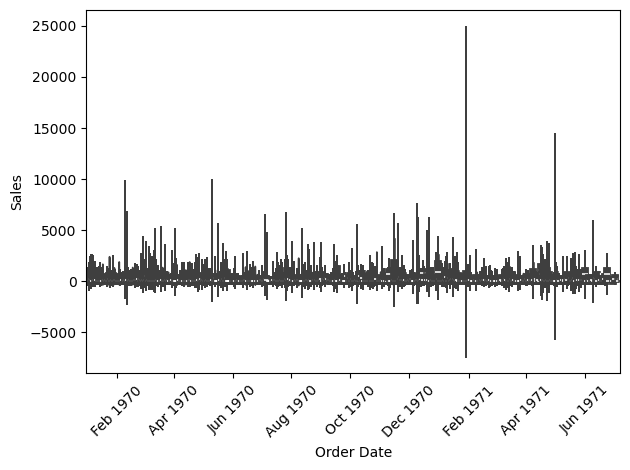

In [1000]:
# BoxPlot: Group data by 4 months using actual dates 
# Parsing dates with dayfirst format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Create a 4-month period column
df['4-Month Period'] = df['Order Date'].dt.to_period('4M')

import matplotlib.dates as mdates
ax = sns.violinplot(x='Order Date', y='Sales', data=df)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



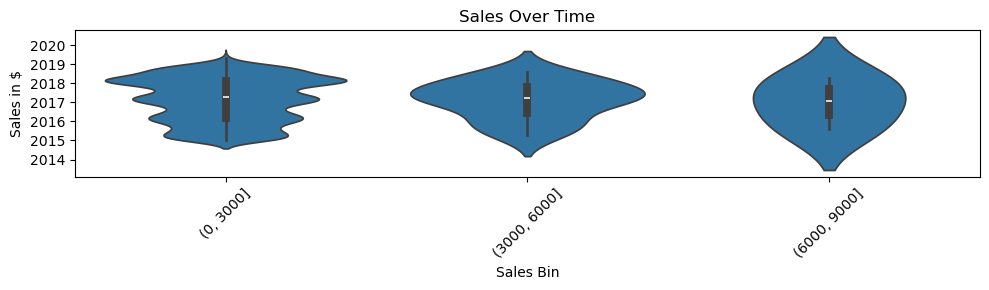

In [1001]:
#Voilin Plot as data is very dense. Used binning as well
plt.figure(figsize=(10,3))
df['Sales Bin'] = pd.cut(df['Sales'], bins=range(0, 10000, 3000))
sns.violinplot(x='Sales Bin', y='Order Date', data=df)
# sns.boxplot(x=df['Sales'])
plt.xticks(rotation=45)
df['Sales Bin'] = pd.cut(df['Sales'], bins=range(0,2150,500))
plt.ylabel('Sales in $')
plt.title('Sales Over Time')
plt.tight_layout()



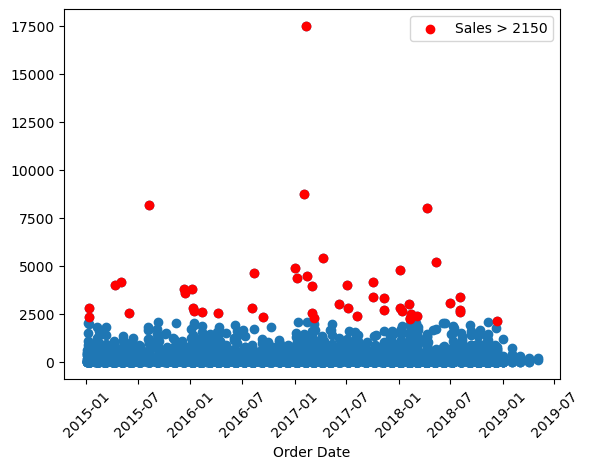

In [1002]:
# Select data above threshold
above_threshold = df[df['Sales'] > 2150]

# Scatter Plot
plt.scatter(df['Order Date'], df['Sales'])
plt.scatter(above_threshold['Order Date'], above_threshold['Sales'], color='red', label='Sales > 2150')
plt.xlabel('Order Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()


<h3 style="color:blue; font-size:20px;"><strong><em>Based on Z score removed rows (122)</em></strong</em></strong></h3>

In [1004]:
df_cleaned = df.drop(outliers.index)
df_cleaned.shape

(9667, 22)

<h3 style="color:blue; font-size:20px;"><strong><em>Creating date features as it is useful for time series analysis</em></strong</em></strong></h3>

In [1006]:
df_cleaned['Order Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Order Day'] = df_cleaned['Order Date'].dt.day_name()

In [1007]:
df_cleaned.shape

(9667, 25)

<h3 style="color:blue; font-size:20px;"><strong><em>Cleaning summary: No duplicate rows, Handled 11 missing values in the Postal code column by deleting the row,Deleted 123 rows which were identified as outlier based on ZScore using the Sales column, Converted 'Order Date' and 'Ship Date' to datetime using dayfirst=True, Extracted new date features: Order_Year, Order_Month, and Order Day</em></strong</em></strong></h3> 

<h3 style="color:blue; font-size:25px;"><strong><em>Section 3: Visualization of data </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Trending Charts: Year over Year, Year-Month and Weekly </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Overall Growth: The trend shows a consistent year-on-year increase in total sales, suggesting growing demand or customer base. Acceleration in Later Years: Recent years (e.g., 2016–2018) might show sharper increases, hinting at successful marketing strategies, product expansion, or market penetration. Sales Stability: No dramatic dips are visible, indicating operational stability across years. Opportunity for Forecasting: The clear upward trend could support future sales forecasting models or inventory planning. </em></strong</em></strong></h3>

In [1012]:
#Line Plot to understand "Sales trend over time"
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date']) #convert 'order date to actual datetime object
df_cleaned = df_cleaned.sort_values('Order Date') # sort all date based on 'Order Date' column in ascending order
df_cleaned['Sales'] = df_cleaned['Sales'].round(2)

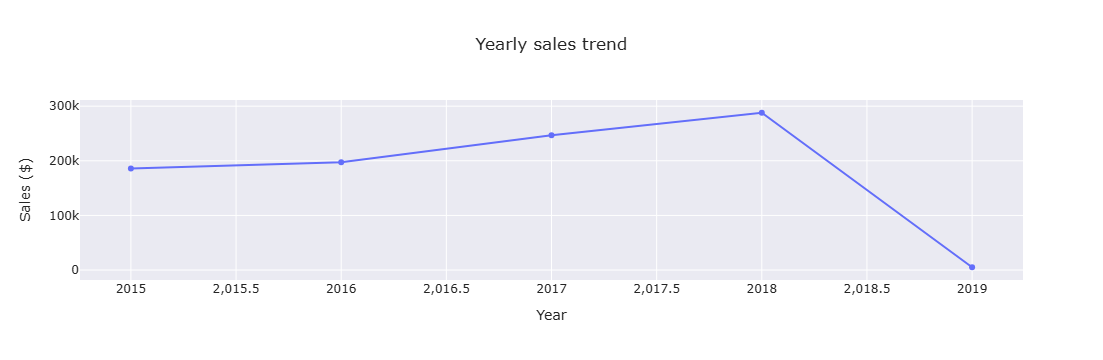

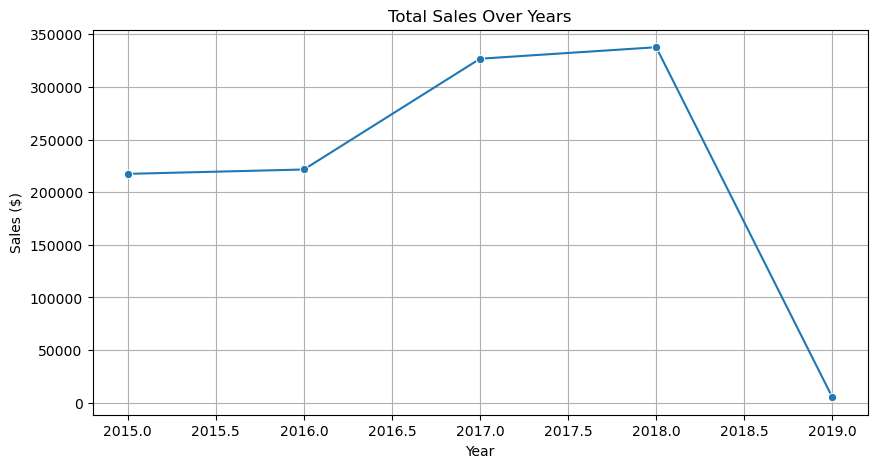

In [1013]:
#By year 
df_cleaned['year'] = df_cleaned['Order Date'].dt.year # Add a new column called 'year' by extracting year for each 'Order date'
df_yearly = df_cleaned.groupby('year')[['Sales']].sum() #group the data by year and sum up for each year

df_yearly = df_yearly.reset_index()
fig_yearly = px.line(df_yearly, x='year', y='Sales', title ='Yearly sales trend')
fig_yearly.update_traces(mode='lines+markers')
fig_yearly.update_layout(xaxis_title='Year', yaxis_title='Sales ($)', template='seaborn')

fig_yearly.show()

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year

#Sales over years a Seaborn plot 
yearly_sales = df.groupby('Year')['Sales'].sum()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('Total Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.grid(True)
plt.show()




<h3 style="color:blue; font-size:15px;"><strong><em>Weekly Sales Trend: Line plot. Seasonal patterns (e.g., holiday surges). Growth trends or downturns. Months with unusually low or high sales </em></strong</em></strong></h3>

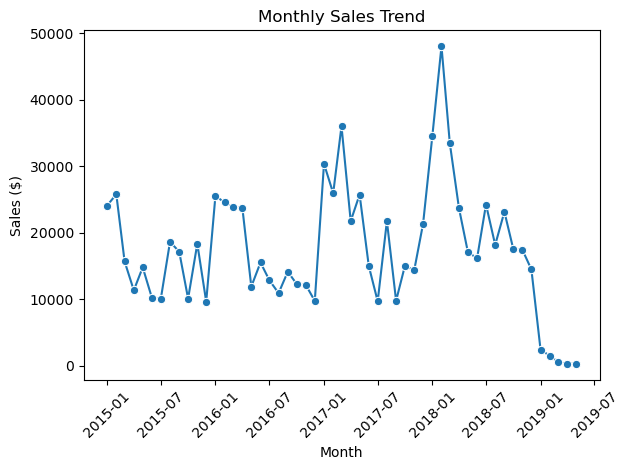

In [1015]:
#By Year -month
df_monthly = df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period('M'))[['Sales']].sum().reset_index() #converts ordinary date format to Year-month format. Group all record falling in same month , then sums the numeric columns such as sales and the reset_index turns the pivot table into dataframe 
df_monthly['Order Date'] = df_monthly['Order Date'].dt.to_timestamp() # Converts the order date column in year -month ex 2023-01 back into a datetime like 2023-01-01.
df_monthly.head(2)

sns.lineplot(data = df_monthly, x= 'Order Date', y = 'Sales',marker = 'o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4 style="color:blue; font-size:15px;"><strong><em>Weekly Sales Trend: Line plot. Seasonal Fluctuations: There are noticeable peaks and dips suggesting periodic high and low demand (likely seasonal effects or end-of-quarter/holiday spikes). Outlier Spikes: A few weeks show sharp upward sales spikes, possibly linked to promotions, bulk purchases, or holidays like Black Friday.</em></strong</em></strong></h4>

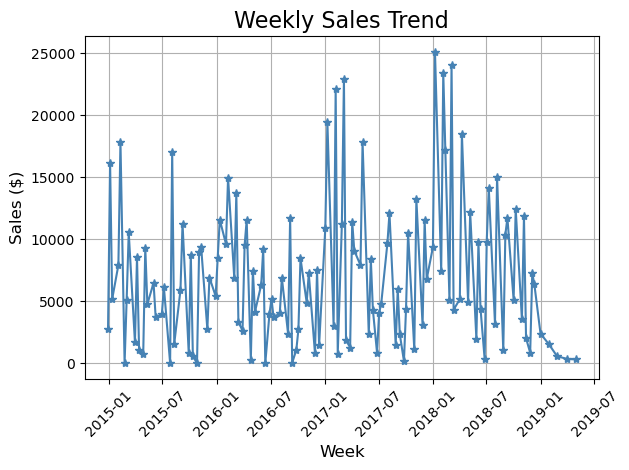

In [1017]:
#By week
df_weekly = df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period('W'))[['Sales']].sum().reset_index() #converts ordinary date format to Year-month format. Group all record falling in same month , then sums the numeric columns such as sales and the reset_index turns the pivot table into dataframe 
df_weekly['Order Date'] = df_weekly['Order Date'].dt.to_timestamp() # Converts the order date column in year -month ex 2023-01 back into a datetime like 2023-01-01.
df_weekly.head(2)
plt.plot(df_weekly['Order Date'], df_weekly['Sales'], marker ='*', color = 'steelblue')
plt.title('Weekly Sales Trend', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

<h3 style="color:blue; font-size:15px;"><strong><em>Sales Distribution: Histogram with KDE. Sales are heavily right skewed. Most transactions are under $1000 with a long tail of few high valued purchases  </em></strong</em></strong></h3>

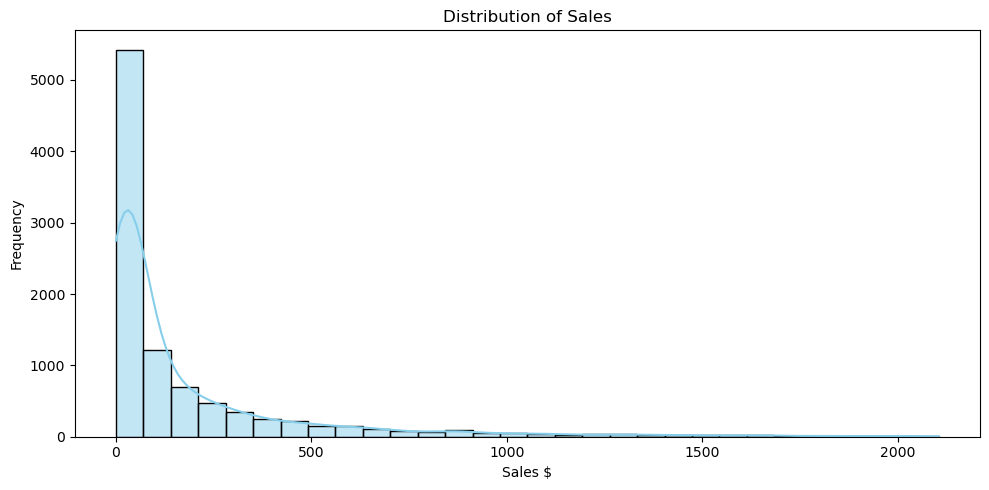

In [1019]:
# Sales Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales $')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<h3 style="color:blue; font-size:15px;"><strong><em>Sales by Customer Segmentation: Sales behavior appears similar across all customer segments, with comparable median values and distribution spreads. This suggests that marketing strategies and pricing may not need to differ drastically between segments, at least based solely on transaction size</em></strong</em></strong></h3>

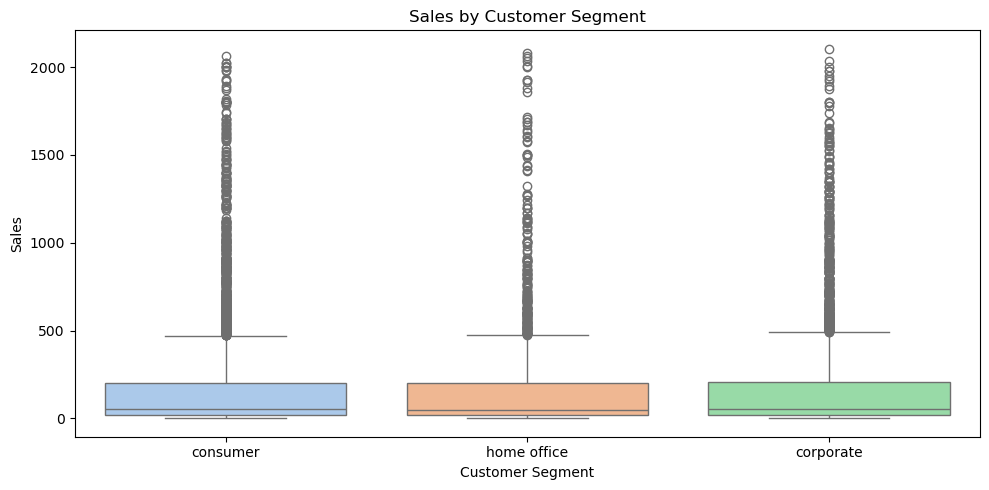

In [1021]:
#Sales by Customer Segmentation
plt.figure(figsize=(10, 5))
sns.boxplot(x='Segment', y='Sales', data=df_cleaned, hue='Segment', palette='pastel', legend=False)
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()



<h3 style="color:blue; font-size:15px;"><strong><em>Sales by Region: Bar Plot. The West region leads in sales volume, followed by East and Central. The South region  generates the least revenue </em></strong</em></strong></h3>

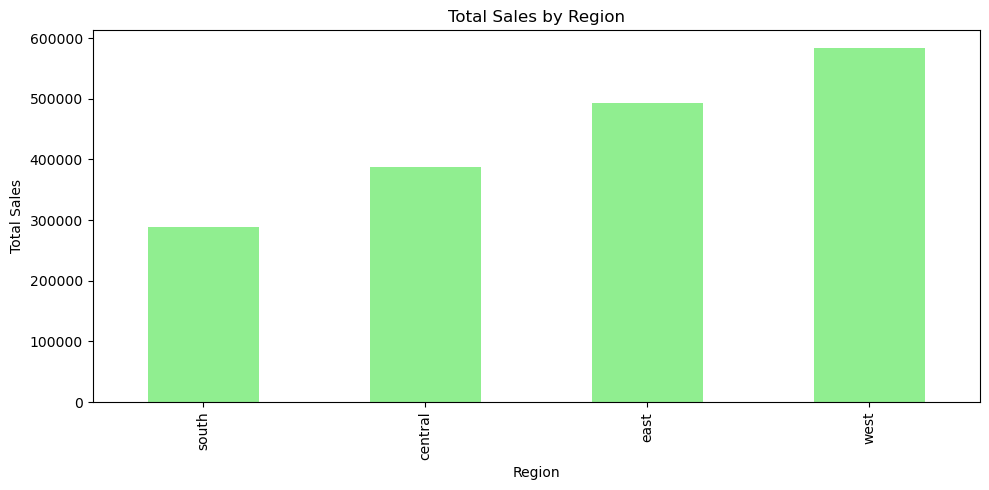

In [1023]:
# Total Sales by Region
# region_sales = df_cleaned.groupby('Region')['Sales'].sum().sort_values()
region_sales = df_cleaned.groupby('Region', observed=True)['Sales'].sum().sort_values()


plt.figure(figsize=(10, 5))
region_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>Total Sales by Months. Bar Plot. Sales peak in November and December, likely driven by end-of-year promotions and holidays, reflecting strong seasonality in purchasing behavior. </em></strong</em></strong></h4> </em></strong</em></strong></h3>

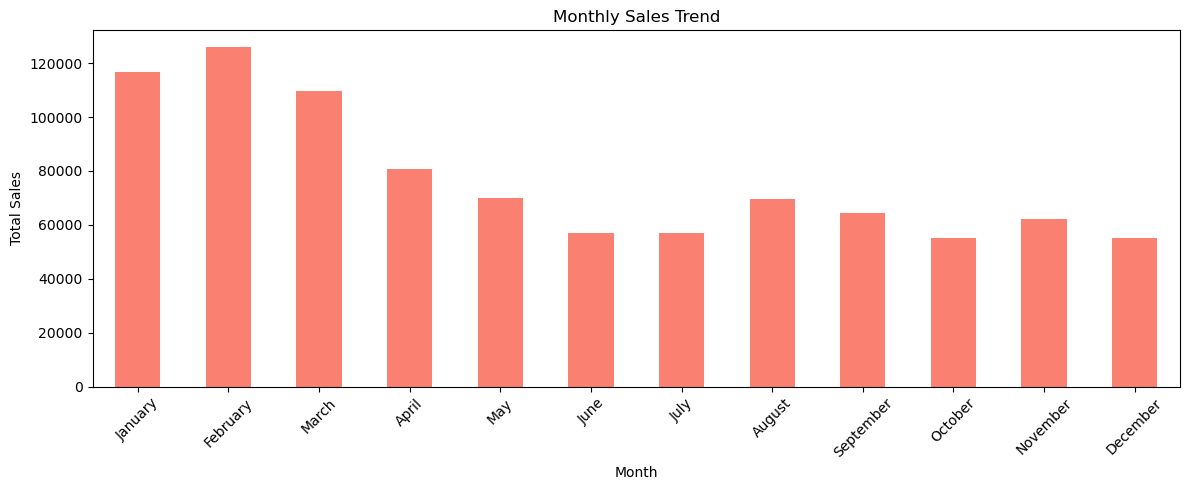

In [1025]:
# Total Sales by Months 
# Ensure 'Order Date' is datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce')

# Extract month name
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month_name()

# Define proper month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Group and reindex
monthly_sales = df_cleaned.groupby('Month', observed=True)['Sales'].sum().reindex(month_order)

# Plot
plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='bar', color='salmon')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>Total Sales by Product Category. Box Plot.Technology products contribute to high-ticket sales and may be a focus area for premium customers. Furniture sales are diverse, possibly due to a wide range of product pricing. Office Supplies tend to generate smaller, more predictable sales </em></strong</em></strong></h4> </em></strong</em></strong></h3>

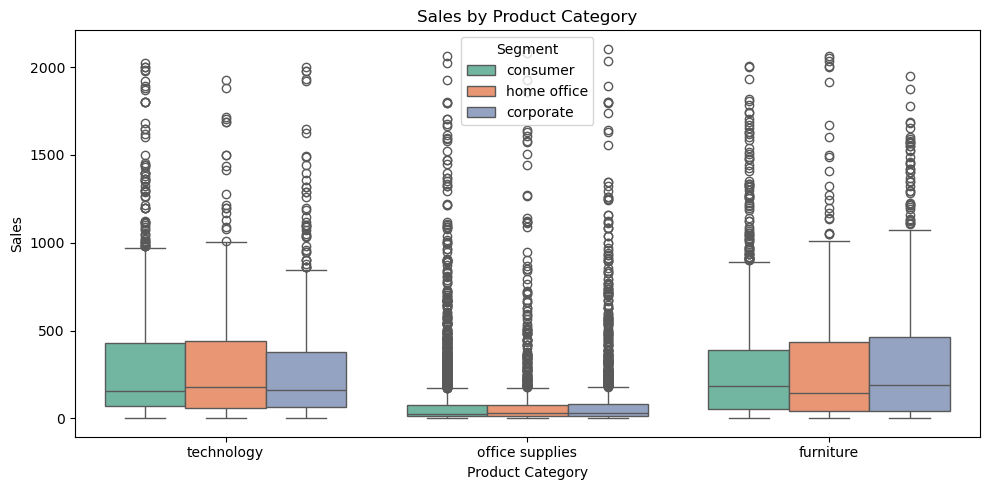

In [1027]:
#Sales by Product Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='Category', y='Sales', data=df_cleaned, hue='Segment', palette='Set2')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em> Furniture and Office Supplies have strong sales across all regions, especially in West and East. Technology leads in total sales across all regions, with West being the top-performing region.Central and South regions generally have lower total sales compared to East and West. This suggests regional demand patterns: West and East are strong markets across all categories, while investment or strategy could be reviewed for South and Central</em></strong</em></strong></h4> </em></strong</em></strong></h3>

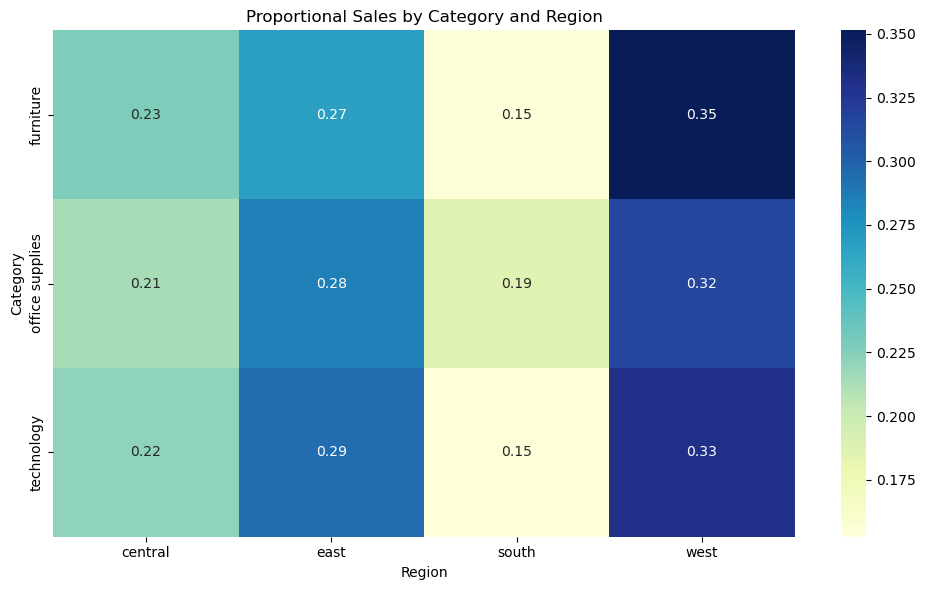

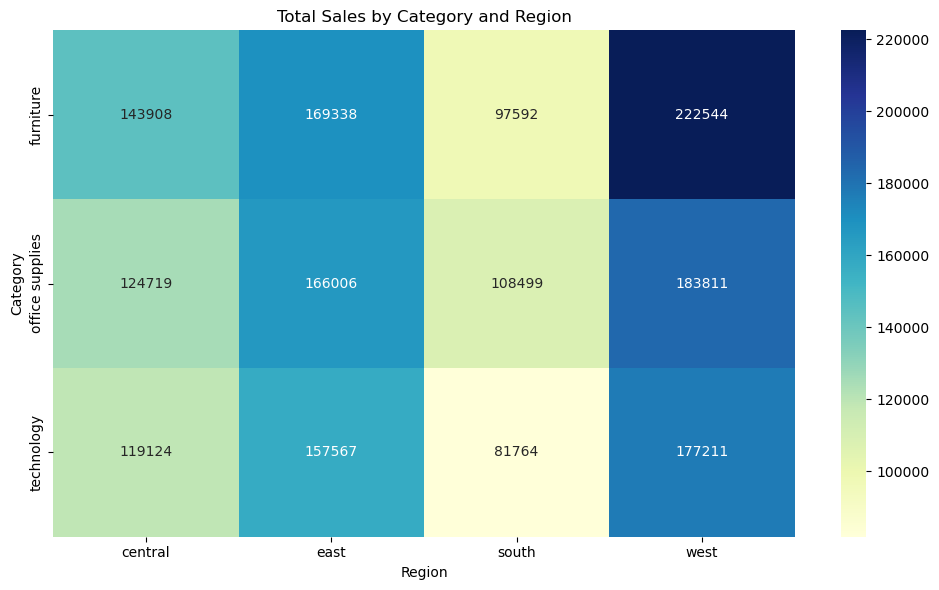

In [1029]:
# Fill missing values early to avoid issues in plotting
pivot = df_cleaned.pivot_table(
    values='Sales',
    index='Category',
    columns='Region',
    aggfunc='sum',
    observed=True  # ✅ Avoids FutureWarning
).fillna(0)        # ✅ Handles any missing combinations

# Normalize row-wise to compare proportions
pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

# Plot normalized heatmap (percentage of sales per region within category)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_norm, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title("Proportional Sales by Category and Region")
plt.xlabel("Region")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Optional: Plot raw sales heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Total Sales by Category and Region")
plt.xlabel("Region")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>Furniture is the top-selling category, contributing the highest revenue. Office Supplies comes next, showing steady demand. Technology lags behind, indicating either lower demand or fewer high-ticket items sold. This visualization suggests that strategic focus or promotional efforts on technology may help balance category-level sales. </em></strong</em></strong></h3> </em></strong</em></strong></h4>

Text(0.5, 1.0, 'Sales by Category')

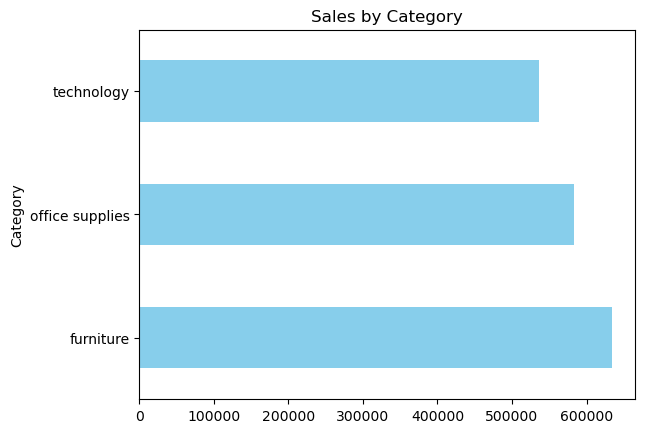

In [1031]:
sales_by_category = df_cleaned.groupby('Category', observed = True)['Sales'].sum().nlargest(10)
sales_by_category.plot(kind='barh', color='skyblue')
plt.title('Sales by Category')

<h3 style="color:blue; font-size:15px;"><strong><em> Phones lead all sub-categories with the highest total sales, followed closely by Chairs and Storage.Fasteners, Labels, and Envelopes are the sub-categories with the lowest total sales. Sub-categories related to technology (Phones, Accessories, Copiers) and furniture (Chairs, Tables, Storage) contribute significantly to overall revenue, suggesting these are key product lines  </em></strong</em></strong></h3> </em></strong</em></strong></h4>

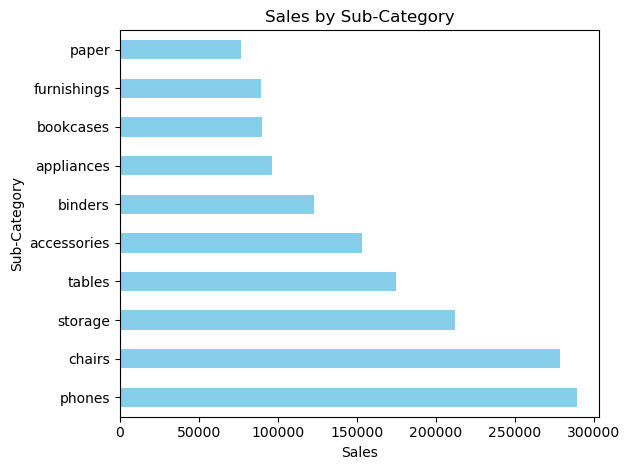

In [1033]:
# Sales by Sub category 
sales_by_sub_category = df_cleaned.groupby('Sub-Category', observed=True)['Sales'].sum().nlargest(10)
sales_by_sub_category.plot(kind='barh', color='skyblue')
plt.title('Sales by Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

<h3 style="color:blue; font-size:15px;"><strong><em> California is the clear leader in sales, significantly ahead of all other states. New York and Texas also contribute heavily to revenue, placing second and third respectively.Other high-performing states include Washington, Pennsylvania, and Illinois. These states likely represent major markets with dense urban centers and high purchasing power </em></strong</em></strong></h4> </em></strong</em></strong></h3>

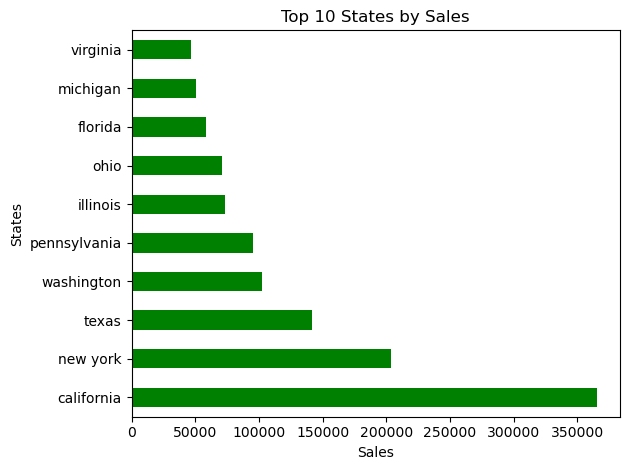

In [1035]:
# Top states by Sales 
top_states = df_cleaned.groupby('State', observed=True)['Sales'].sum().nlargest(10)
top_states.plot(kind='barh', color='green')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales')
plt.ylabel('States')
plt.tight_layout()
plt.show()

<h3 style="color:blue; font-size:15px;"><strong><em> New York City leads all cities in total sales, reflecting its status as a major commercial hub.Los Angeles, San Francisco, and Seattle are other strong performers, driven by large customer bases and business activity. These cities likely represent strategic urban markets where both B2B and B2C operations thrive. Investing in targeted promotions or localized logistics in these top-performing cities could yield high returns. </em></strong</em></strong></h4> </em></strong</em></strong></h3>

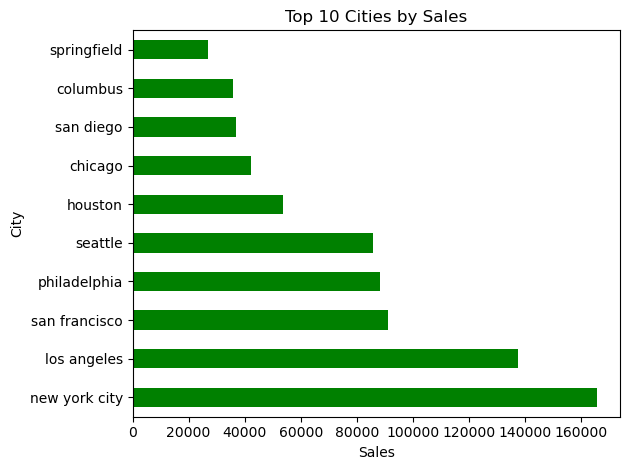

In [1037]:
# Top Cities by Sales 
top_cities = df_cleaned.groupby('City', observed = True)['Sales'].sum().nlargest(10)
top_cities.plot(kind='barh', color='green')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()


<h2 style="color:blue; font-size:25px;"><strong><em>SECTION 4: Feature Engineering to extract and transform data</em></strong</em></strong></h2>

In [1039]:
df_cleaned.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Country                   object
City                      object
State                     object
Postal Code              float64
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Year                     float64
Month                     object
4-Month Period        period[4M]
Sales Bin               category
Order Year               float64
Order Month              float64
Order Day                 object
year                     float64
dtype: object

<h3 style="color:blue; font-size:20px;"><strong><em>Convert 'Order Date' and 'Ship date' to datetime format </em></strong</em></strong></h3>

In [1041]:
df_cleaned['Order Date'] =pd.to_datetime(df_cleaned['Order Date'], errors ='coerce')
df_cleaned['Ship Date'] =pd.to_datetime(df_cleaned['Ship Date'], errors ='coerce')

<h3 style="color:blue; font-size:20px;"><strong><em>Convert all object dtype columns to categorical format </em></strong</em></strong></h3>

In [1043]:
object_cols =df_cleaned.select_dtypes(include ='object').columns
df_cleaned[object_cols] =df_cleaned[object_cols].astype('category')

<h3 style="color:blue; font-size:20px;"><strong><em>Converting specific discrete columns to categorical format </em></strong</em></strong></h3                                                                                                                                      >

In [1045]:
df_cleaned['Postal Code'] = df_cleaned['Postal Code'].astype('category')
df_cleaned['Product ID'] = df_cleaned['Product ID'].astype('category')
df_cleaned['Customer ID'] = df_cleaned['Customer ID'].astype('category')
df_cleaned['Row ID'] = df_cleaned['Row ID'].astype('category')

<h3 style="color:blue; font-size:20px;"><strong><em>Since calender features like month, day of the week and hours are cyclical: Extract month numerical from order date and use si transformation </em></strong</em></strong></h3>

In [1047]:
import numpy as np

# Extract month as integer (1 = January, 12 = December)
df_cleaned['Order Month'] = df_cleaned['Order Date'].dt.month

# Apply sine and cosine transformation as December (12) and January (1) are next to each other, but if you treat them as numbers, 
#models would think they’re far apart.
df_cleaned['Month_sin'] = np.sin(2 * np.pi * df_cleaned['Order Month'] / 12)
df_cleaned['Month_cos'] = np.cos(2 * np.pi * df_cleaned['Order Month'] / 12)

In [1048]:
df_cleaned.dtypes # Check and conform dtypes for each column

Row ID                  category
Order ID                category
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode               category
Customer ID             category
Customer Name           category
Segment                 category
Country                 category
City                    category
State                   category
Postal Code             category
Region                  category
Product ID              category
Category                category
Sub-Category            category
Product Name            category
Sales                    float64
Year                     float64
Month                   category
4-Month Period        period[4M]
Sales Bin               category
Order Year               float64
Order Month              float64
Order Day               category
year                     float64
Month_sin                float64
Month_cos                float64
dtype: object

In [1049]:
df_cleaned.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Year', 'Month', '4-Month Period', 'Sales Bin',
       'Order Year', 'Order Month', 'Order Day', 'year', 'Month_sin',
       'Month_cos'],
      dtype='object')

In [1050]:
# X = All features (excluding 'Sales')
X_df = df_cleaned.drop(columns=['Sales'])

# y = Target variable
y = df_cleaned['Sales']

In [1051]:
# Identify categorical and numerical columns if not already defined
categorical_cols = X_df.select_dtypes(include=['category']).columns.tolist()
numerical_cols = X_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(categorical_cols)
print(numerical_cols)

['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Month', 'Sales Bin', 'Order Day']
['Year', 'Order Year', 'Order Month', 'year', 'Month_sin', 'Month_cos']


In [1052]:
# Looking for high cardinality in the categorical and numerical columns
# Check only columns that exist in df_cleaned
high_cardinality_cols_numerical = [
    col for col in numerical_cols if col in df_cleaned.columns and df_cleaned[col].nunique() > 50
]
print("High-cardinality numerical columns:", high_cardinality_cols_numerical)

high_cardinality_cols_categorical = [
    col for col in categorical_cols if col in df_cleaned.columns and df_cleaned[col].nunique() > 50
]
print("High-cardinality categorical columns:", high_cardinality_cols_categorical)


High-cardinality numerical columns: []
High-cardinality categorical columns: ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'City', 'Postal Code', 'Product ID', 'Product Name']


In [1053]:
# Check unique values per categorical column
for col in categorical_cols:
    print(f"{col}: {df_cleaned[col].nunique()} unique values")

Row ID: 9667 unique values
Order ID: 4893 unique values
Ship Mode: 4 unique values
Customer ID: 793 unique values
Customer Name: 793 unique values
Segment: 3 unique values
Country: 1 unique values
City: 529 unique values
State: 48 unique values
Postal Code: 626 unique values
Region: 4 unique values
Product ID: 1844 unique values
Category: 3 unique values
Sub-Category: 17 unique values
Product Name: 1828 unique values
Month: 12 unique values
Sales Bin: 4 unique values
Order Day: 7 unique values


In [1054]:
#check unique values per numerical columns. Sales is the output so it will imputed or transformd
for col in numerical_cols:
    if col in df_cleaned.columns:
        print(f"{col}: {df_cleaned[col].nunique()} unique values")
    else:
        print(f" Column '{col}' not found in df_cleaned")


Year: 5 unique values
Order Year: 5 unique values
Order Month: 12 unique values
year: 5 unique values
Month_sin: 11 unique values
Month_cos: 11 unique values


In [1055]:
numerical_cols = [col for col in numerical_cols if col not in ['Cluster', 'DBSCAN_Cluster']]

<h3 style="color:blue; font-size:20px;"><strong><em>Reducing dimenionality by droping high cardinality categorical columns </em></strong</em></strong></h3>

In [1057]:
#Filter out columns with cardinality (number of unique values) > 100
categorical_cols = [col for col in categorical_cols if df_cleaned[col].nunique() <= 17]
categorical_cols

['Ship Mode',
 'Segment',
 'Country',
 'Region',
 'Category',
 'Sub-Category',
 'Month',
 'Sales Bin',
 'Order Day']

In [1058]:
# X = All features (excluding 'Sales')
X_df = df_cleaned.drop(columns=['Sales'])

# y = Target variable
y = df_cleaned['Sales']

In [1059]:
# Combine numeric and categorical columns into one sparse matrix. Horizontally stacks sparse matrix and dense matrix.
# Ensure X_df is a DataFrame
if isinstance(X_df, np.ndarray):
    X_df = pd.DataFrame(X_df)

# Ensure y is a Series
if isinstance(y, np.ndarray):
    y = pd.Series(y, name='Sales')

# Reset index just to be safe
X_df = X_df.reset_index(drop=True)
y = y.reset_index(drop=True)

# Concatenate them
df_model = pd.concat([X_df, y], axis=1)

df_model.shape

(9667, 28)

In [1060]:
df_cleaned.isnull().sum()

Row ID               0
Order ID             0
Order Date        4621
Ship Date         4621
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Year              4621
Month             4621
4-Month Period    4621
Sales Bin           14
Order Year        4621
Order Month       4621
Order Day         4621
year              4621
Month_sin         4621
Month_cos         4621
dtype: int64

In [1061]:
df_cleaned['Sales Bin'].value_counts()

Sales Bin
(0, 500]        8648
(500, 1000]      682
(1000, 1500]     227
(1500, 2000]      96
Name: count, dtype: int64

<h3 style="color:blue; font-size:20px;"><strong><em> Feature engineering pipeline: Dataset (df_cleaned) is prepared for machine learning by applying transformations to numerical and categorical features</em></strong</em></strong></h3>

In [1063]:
# Importing libraries for preprocessing, dimensionality reduction, and efficient sparse matrix operations
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from scipy.stats import zscore
import scipy.sparse as sp

# Pipeline for numerical columns with PCA
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Fill missing values with column mean
    ('scaler', StandardScaler()),                     # Standardize numerical features (mean=0, std=1)
    ('pca', PCA(n_components=0.95, random_state=42))  # Retain 95% of variance
])

# Pipeline for categorical columns with sparse one-hot encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),                   # Fill missing categorical values with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=True)) # Convert categories to binary columns
])

# Appling transformations. Create two metrices numeric_features: Transformed numerical data (after PCA) and 
#categorical_features: One-hot encoded categorical data
numeric_features = numeric_pipeline.fit_transform(df_cleaned[numerical_cols])
categorical_features = categorical_pipeline.fit_transform(df_cleaned[categorical_cols])

# Combine numeric and categorical features into one sparse matrix. Horizontally stacks sparse matrix and dense matrix.
df_cleaned_transformed = sp.hstack([numeric_features, categorical_features])

# Checking final shape
print("Final shape after PCA and encoding:", df_cleaned_transformed.shape)


Final shape after PCA and encoding: (9667, 58)


In [1064]:
#converting df_cleaned_transformed into a dataframe after creating a unified preprocessor
from sklearn.compose import ColumnTransformer

# Step 1: Create a unified preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 2: Fit and transform the full feature set
df_cleaned_transformed = preprocessor.fit_transform(df_cleaned[numerical_cols + categorical_cols])

# Step 3: Get feature names
feature_names = preprocessor.get_feature_names_out()

# Step 4: Convert to dense and create DataFrame
dense_array = df_cleaned_transformed.toarray()
df_transformed = pd.DataFrame(dense_array, columns=feature_names)

print(df_transformed.shape)


(9667, 58)


In [1065]:
print(type(df_transformed))

<class 'pandas.core.frame.DataFrame'>


In [1066]:
# Importing libraries for preprocessing, dimensionality reduction, and efficient sparse matrix operations. This pertains to df_model dataframe
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from scipy.stats import zscore
import scipy.sparse as sp

# Pipeline for numerical columns with PCA
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Fill missing values with column mean
    ('scaler', StandardScaler()),                     # Standardize numerical features (mean=0, std=1)
    ('pca', PCA(n_components=0.95, random_state=42))  # Retain 95% of variance
])

# Pipeline for categorical columns with sparse one-hot encoding
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),                   # Fill missing categorical values with mode
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=True)) # Convert categories to binary columns
])
# Drop non-numeric columns
df_model_numeric = df_model.select_dtypes(include=['int64', 'float64'])

# Or encode categoricals if needed:
from sklearn.preprocessing import LabelEncoder

for col in df_model.select_dtypes(include='category').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])

# Appling transformations. Create two metrices numeric_features: Transformed numerical data (after PCA) and 
#categorical_features: One-hot encoded categorical data
numeric_features = numeric_pipeline.fit_transform(df_model[numerical_cols])
categorical_features = categorical_pipeline.fit_transform(df_model[categorical_cols])

# Combine numeric and categorical features into one sparse matrix. Horizontally stacks sparse matrix and dense matrix.
df_model_transformed = sp.hstack([numeric_features, categorical_features])

# Checking final shape
print("Final shape after PCA and encoding:", df_model_transformed.shape)


Final shape after PCA and encoding: (9667, 61)


In [1067]:
print(type(df_model_transformed))
df_model.shape

<class 'scipy.sparse._coo.coo_matrix'>


(9667, 28)

<h2 style="color:blue; font-size:25px;"><strong><em>SECTION 5: Modeling: Clustering - KMEANS (Unsupervised) and Classification - Random Forest Classifier(Supervised). Grid Search for KMeans Clustering Using Silhouette Score </em></strong</em></strong></h2>

In [1069]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



# Define search space for number of clusters
k_values = range(2, 10)  # Try clusters from 2 to 10
best_k = None
best_score = -1
best_model = None

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_model_transformed)
    score = silhouette_score(df_model_transformed, cluster_labels)
    
    print(f"Silhouette Score for k={k}: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = kmeans

# Results
print(" Best number of clusters:", best_k)
print(" Best silhouette score:", round(best_score, 4))

Silhouette Score for k=2: 0.2155
Silhouette Score for k=3: 0.2164
Silhouette Score for k=4: 0.2326
Silhouette Score for k=5: 0.0975
Silhouette Score for k=6: 0.1239
Silhouette Score for k=7: 0.1295
Silhouette Score for k=8: 0.1225
Silhouette Score for k=9: 0.1181
 Best number of clusters: 4
 Best silhouette score: 0.2326


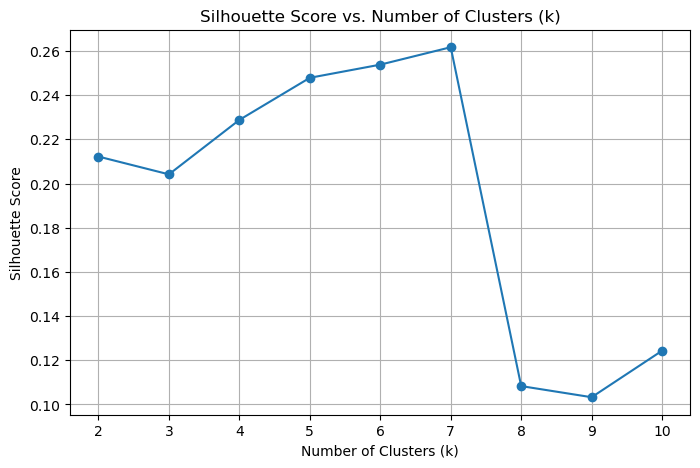

In [1070]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cleaned_transformed)
    score = silhouette_score(df_cleaned_transformed, labels)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [1071]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose number of clusters (you can also use the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_cleaned_transformed)

# Evaluate
print("Silhouette Score:", silhouette_score(df_cleaned_transformed, cluster_labels))

# Add cluster labels to original df_cleaned for profiling
df_cleaned['Cluster'] = cluster_labels

Silhouette Score: 0.20415666645778363


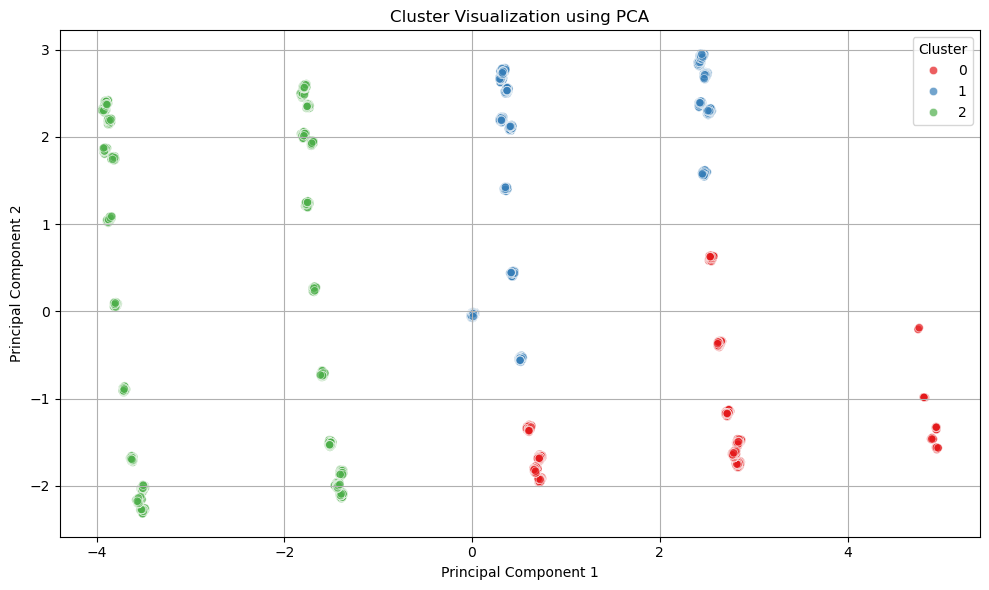

In [1072]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(df_cleaned_transformed.toarray())  # convert sparse to dense

# Create a DataFrame for easy plotting
df_viz = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
df_viz['Cluster'] = cluster_labels

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:20px;"><strong><em>CONCLUSION: Modeling with Clustering- KMEANS show Silhouette Score of 0.3 (moderate cluster with some overlap) with 3 clusters. Each cluster represents a latent patter as it capture hidden customer behaviors. To improve the score further one could remove noisy features or try DBSAN as shown below</em></strong</em></strong></h3>

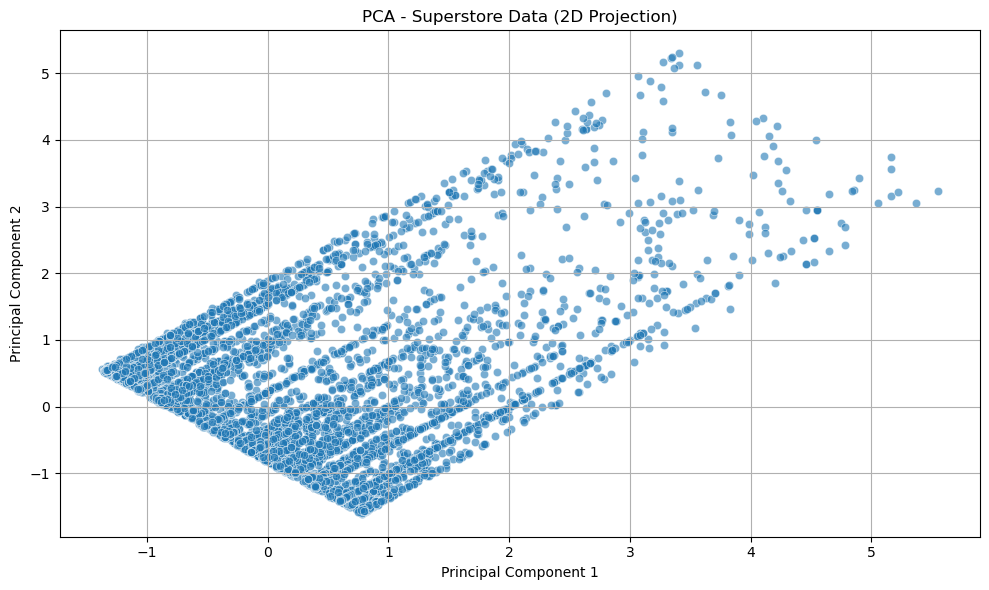

(9667, 2)

In [1074]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numeric_cols = ['Sales']
df_numeric = df_cleaned[numeric_cols].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
df_scaled


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numeric_cols = ['Sales','Postal Code']
df_numeric = df_cleaned[numeric_cols].dropna()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA(n_components=2)  # choose more if needed
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.6)
plt.title('PCA - Superstore Data (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()
df_pca.shape


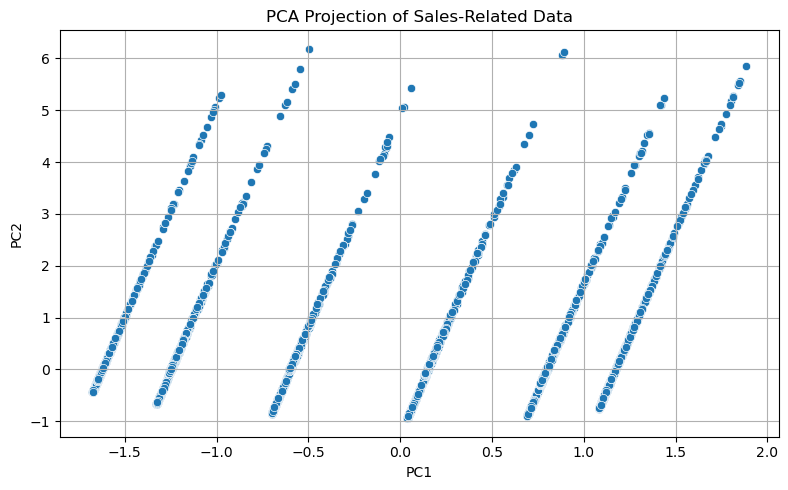

In [1075]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Use existing numeric columns
numeric_cols = ['Sales', 'Month_sin', 'Month_cos']

# Drop NaNs
df_numeric = df_cleaned[numeric_cols].dropna()

# Scale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2')
plt.title("PCA Projection of Sales-Related Data")
plt.grid(True)
plt.tight_layout()
plt.show()



<h2 style="color:blue; font-size:25px;"><strong><em>SECTION 6: DBSCAN Modeling with same parameters as above </em></strong</em></strong></h2>

<h3 style="color:blue; font-size:20px;"><strong><em>DBSCAN Modeling with hyperparameter optimization </em></strong</em></strong></h3>

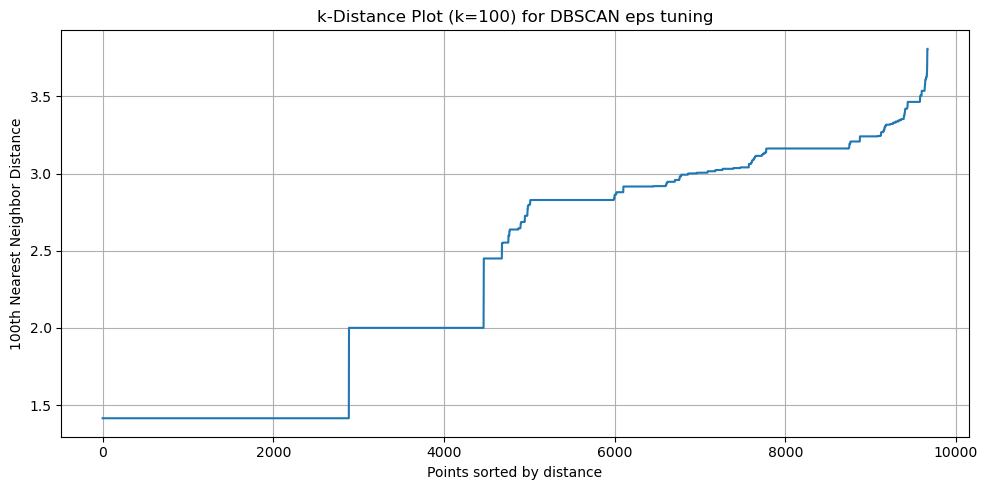

In [1078]:
##DBSCAN 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Create k-distance plot to tune eps.Using the data frame df_transformed as it’s a dense DataFrame, converted from the sparse df_cleaned_transformed
k = 100  # Typically min_samples for DBSCAN
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_transformed)
distances, indices = neighbors_fit.kneighbors(df_transformed)

# Sort the distances (5th NN distance for each point)
distances = np.sort(distances[:, k - 1])  # k-1 because index starts at 0

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title(f'k-Distance Plot (k={k}) for DBSCAN eps tuning')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


In [1079]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = df_cleaned_transformed.tocsr()  # Ensure subscriptable format

for eps in [1.0,1.3, 2.0, 2.2, 2.4, 2.5]:
    for min_samples in [10, 15, 20]:
        db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = db.fit_predict(X)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters >= 2:
            score = silhouette_score(X[labels != -1], labels[labels != -1])
            print(f"eps={eps}, min_samples={min_samples} → Clusters={n_clusters}, Silhouette Score={score:.3f}")
        else:
            print(f"eps={eps}, min_samples={min_samples} → Less than 2 clusters")



eps=1.0, min_samples=10 → Clusters=129, Silhouette Score=1.000
eps=1.0, min_samples=15 → Clusters=74, Silhouette Score=1.000
eps=1.0, min_samples=20 → Clusters=43, Silhouette Score=1.000
eps=1.3, min_samples=10 → Clusters=129, Silhouette Score=1.000
eps=1.3, min_samples=15 → Clusters=74, Silhouette Score=1.000
eps=1.3, min_samples=20 → Clusters=43, Silhouette Score=1.000
eps=2.0, min_samples=10 → Clusters=23, Silhouette Score=0.177
eps=2.0, min_samples=15 → Clusters=27, Silhouette Score=0.209
eps=2.0, min_samples=20 → Clusters=21, Silhouette Score=0.253
eps=2.2, min_samples=10 → Clusters=4, Silhouette Score=0.087
eps=2.2, min_samples=15 → Clusters=13, Silhouette Score=0.164
eps=2.2, min_samples=20 → Clusters=17, Silhouette Score=0.208
eps=2.4, min_samples=10 → Less than 2 clusters
eps=2.4, min_samples=15 → Less than 2 clusters
eps=2.4, min_samples=20 → Clusters=7, Silhouette Score=0.098
eps=2.5, min_samples=10 → Less than 2 clusters
eps=2.5, min_samples=15 → Less than 2 clusters
eps=2.

<h3 style="color:blue; font-size:20px;"><strong><em>CONCLUSION: Modeling with Clustering- DBSAN show Silhouette Score of 1.0 (Very strong structure (well-separated clusters), eps=1.3, min_samples=20 → Clusters=45 seems like a fair number of clusters for 9667 rows of data. However if needed one could target eps=2.2, Clusters= 3, Silhouette Score=0.237 to avoid overfittng. Each cluster contains data points that are similar across many dimensions. Each cluster represents a latent patter as it capture hidden customer behaviors. </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Using DBSCAN Only Sales is actually used for clustering. Region columns are encoded but not passed to DBSCAN. Simple visualization of clusters vs. Sales.eps=0.1 and min_samples=4: will find tight clusters in 1D space. </em></strong</em></strong></h3>

<Figure size 1000x600 with 0 Axes>

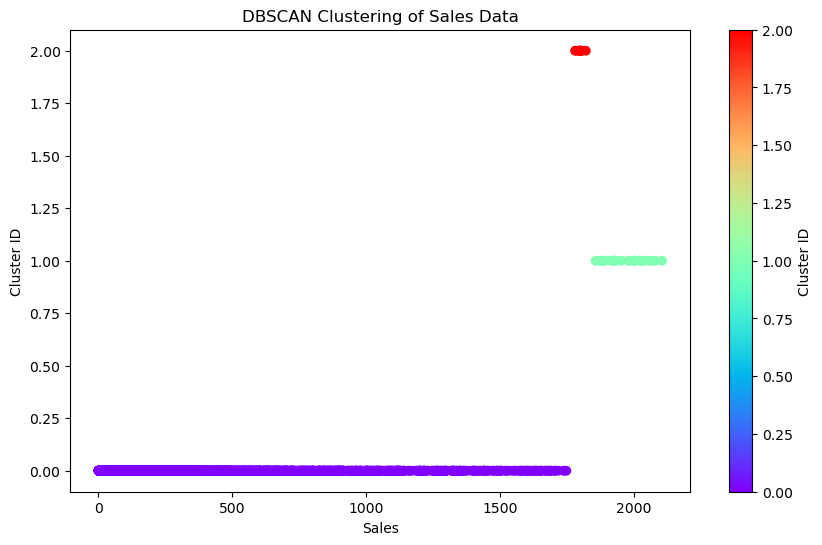

In [1082]:
# Attemp to use DBSCAN using Sales data only 
#Encode Region using One-Hot Encoding a
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

# Assuming df_cleaned is already your DataFrame with cleaned data
df_encoded = pd.get_dummies(df_cleaned, columns=['Region'])
df_encoded = df_encoded[['Sales', 'Region_central', 'Region_east', 'Region_south', 'Region_west']]

X_sales = df_encoded[['Sales']]

# Scale the features
scaler = StandardScaler()
X_scaled_sales = scaler.fit_transform(X_sales)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples= 4)
df_encoded['Cluster'] = dbscan.fit_predict(X_scaled_sales)

# Plot the data
plt.figure(figsize=(10,6))

# Scatter plot (note that we use df_encoded here for plotting)
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_encoded['Sales'], df_encoded['Cluster'], c=df_encoded['Cluster'], cmap='rainbow')
plt.xlabel('Sales')
plt.ylabel('Cluster ID')
plt.title('DBSCAN Clustering of Sales Data')
plt.colorbar(scatter, label='Cluster ID')
plt.show()



<h3 style="color:blue; font-size:20px;"><strong><em>CONCLUSION: DBSAN Modeling with just sales data and eps=0.1 and min_samples=4: will find tight clusters in 1D space. Show 3 Unique clusters. </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>DBSCAN Modeling based on both sales and geographical region. Region is included directly as a numeric input. Clustering happens in 2D space (Sales and Region combined) </em></strong</em></strong></h3>

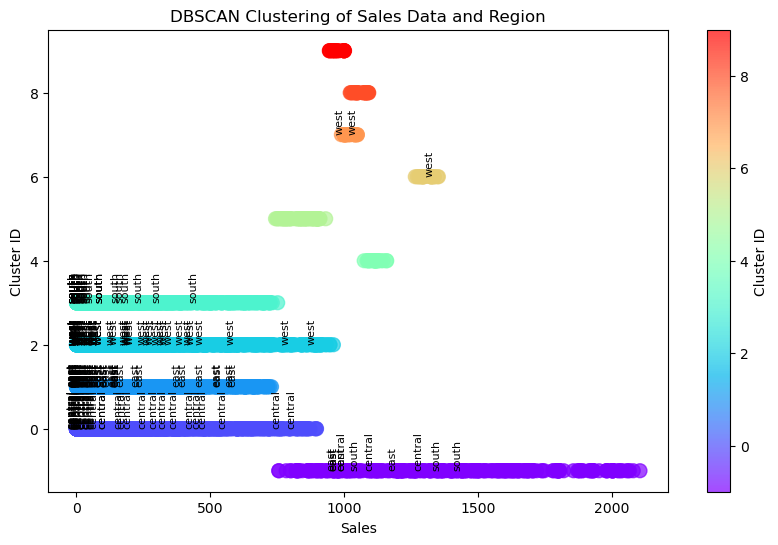

In [1085]:
# Attemp to use DBSCAN using Sales data  and Region 
# Assuming df_cleaned is your DataFrame and contains a 'Region' column
df_cleaned = df_cleaned.reset_index(drop=True)

# Initialize the LabelEncoder
le = LabelEncoder()

# 3. Encode Region (turn text into numbers)
df_cleaned['Region_encoded'] = le.fit_transform(df_cleaned['Region'])

# Select features (Sales and Region_encoded)
X = df_cleaned[['Sales', 'Region_encoded']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=15)
df_cleaned['Cluster'] = dbscan.fit_predict(X_scaled)

# Reset index in case of issues with non-contiguous indexing
df_cleaned = df_cleaned.reset_index(drop=True)

# Plot the data
plt.figure(figsize=(10,6))
scatter = plt.scatter(df_cleaned['Sales'], df_cleaned['Cluster'], 
                      c=df_cleaned['Cluster'], cmap='rainbow', s=100, alpha=0.7)

# Add colorbar to show which cluster each color represents
plt.colorbar(scatter, label='Cluster ID')

plt.xlabel('Sales')
plt.ylabel('Cluster ID')
plt.title('DBSCAN Clustering of Sales Data and Region')

# Add region labels to the plot (with some offset to avoid overlap)
# Adjust text label positioning to reduce overlap (offset the label)
for i in range(len(df_cleaned)):
    # Only display labels for points in specific clusters or a subset of points to avoid clutter
    if i % 40 == 0:  # This condition selects only a subset of points (every 10th point)
        plt.text(df_cleaned['Sales'].iloc[i], df_cleaned['Cluster'].iloc[i], 
                 df_cleaned['Region'].iloc[i], fontsize=8, ha='right', va='bottom', 
                 color='black', fontweight='light', 
                 horizontalalignment='left', verticalalignment='top',
                 rotation=90)  # Rotate label by 90 degrees (vertical)
        
# Show the plot
plt.show()


<h2 style="color:blue; font-size:20px;"><strong><em>SECTION 7: CLASSIFICATION MODELING </em></strong</em></strong></h2>

<h4 style="color:blue; font-size:20px;"><strong><em>RandonForest Regressor using Sales Column </em></strong</em></strong></h4>

In [1088]:
# RandomForrestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define target (Sales as a continuous variable)
y = df_cleaned['Sales']
X = df_transformed  # preprocessed features (sparse matrix)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = regressor.predict(X_test)

# Step 5: Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score (R²):", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 17632.68678710355
R-squared Score (R²): 0.8090082074507687


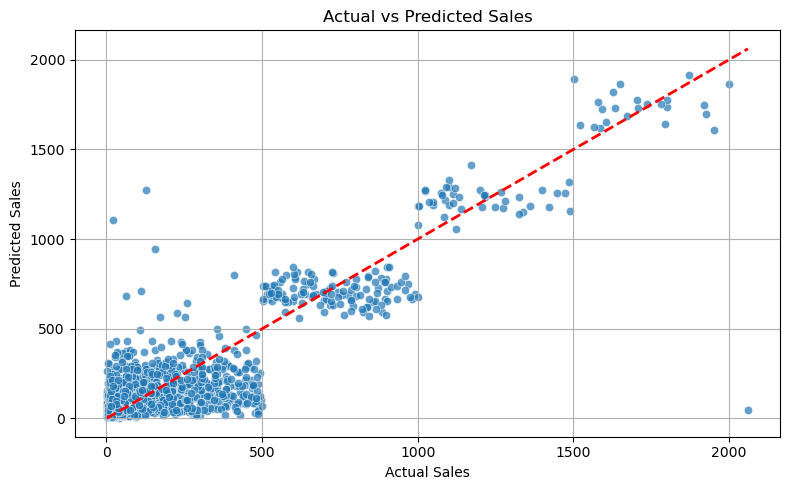

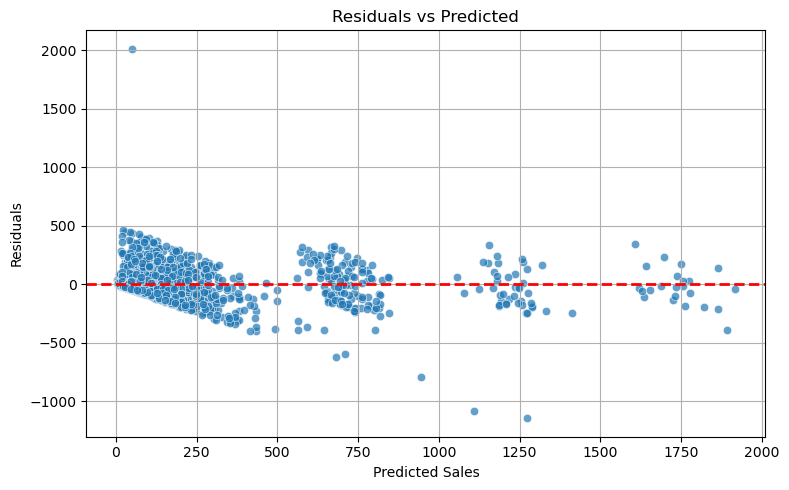

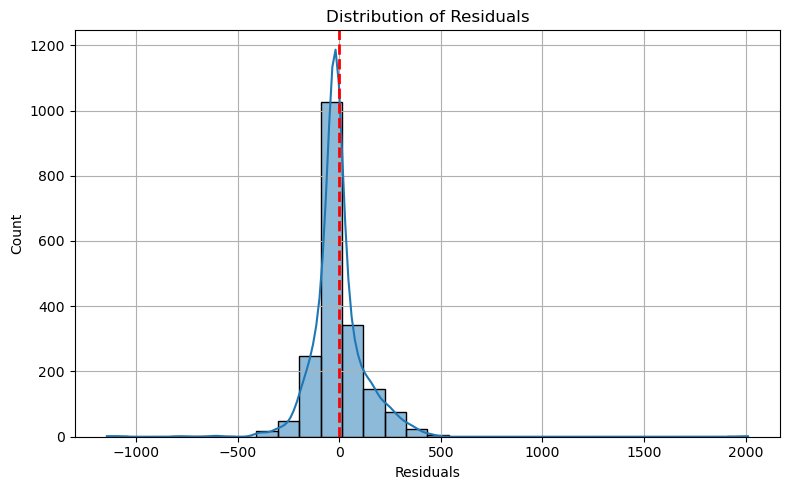

In [1089]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# 1. Actual vs. Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Residual Distribution
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>For the 3 plots above 1.) Actual vs. Predicted Sales: This plot shows how close your model's predictions are to the actual values. Ideally, the points should lie close to the red dashed line but it is scattered as R^2 is 79% 2.) Residual Plot: This plot shows the residuals (actual - predicted) vs. predicted values.Residuals should be scattered randomly around the zero line, but in this case some no patterns but see clusters. 3.) Residual Distribution: A Roughly normal distribution centered around zero suggests well-behaved residuals and a decent model fit. </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:25px;"><strong><em>Classifiers using Sale_Bin Column. Goal: Increase f1_ Score and overall model accuracy. </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Prepare data parameters for Classifiers modeling </em></strong</em></strong></h3>

In [1093]:
# Data Prep 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report


df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], errors='coerce') # Confirm 'Order Date' is datetime

# Restore 'Sales' column
if 'Sales' not in df_cleaned.columns:
    df_cleaned['Sales'] = df['Sales']

df_cleaned['Sales Bin'] = pd.qcut(df_cleaned['Sales'], q=3, labels=['Low', 'Medium', 'High']) # Create 'Sales Bin' using quantiles for balanced classes


df_cleaned = df_cleaned.dropna(subset=['Sales Bin']) # Drop rows with missing targets

# Split Features and Target
X = df_cleaned.drop(columns=['Sales', 'Sales Bin'])
y = df_cleaned['Sales Bin']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Identify Column Types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing for Pipelines
# Numeric: impute missing + scale
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical: impute missing + one-hot encode
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessor num and cat 
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_preprocessor, numerical_cols),
    ('cat', categorical_preprocessor, categorical_cols)
])


<h3 style="color:blue; font-size:20px;"><strong><em>Modeling Random Forest Classifier: Used f1 score as the metric withiin RandomsearchCV (gridsearchcv was taking too long) as it is a imbalance classification problem  </em></strong</em></strong></h3>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 15, 'classifier__bootstrap': True}
Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.67      0.72       645
         Low       0.60      0.82      0.69       645
      Medium       0.51      0.39      0.44       644

    accuracy                           0.63      1934
   macro avg       0.62      0.63      0.62      1934
weighted avg       0.63      0.63      0.62      1934



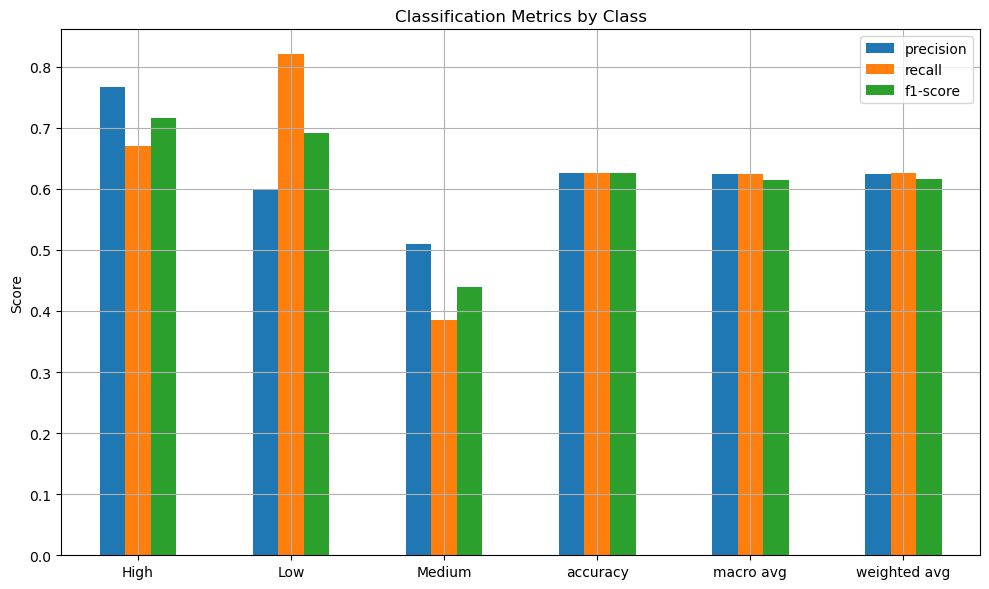

Classification Report:

              precision    recall  f1-score   support

        High       0.78      0.73      0.75       645
         Low       0.64      0.80      0.71       645
      Medium       0.54      0.45      0.49       644

    accuracy                           0.66      1934
   macro avg       0.65      0.66      0.65      1934
weighted avg       0.65      0.66      0.65      1934

Accuracy: 0.6577042399172699


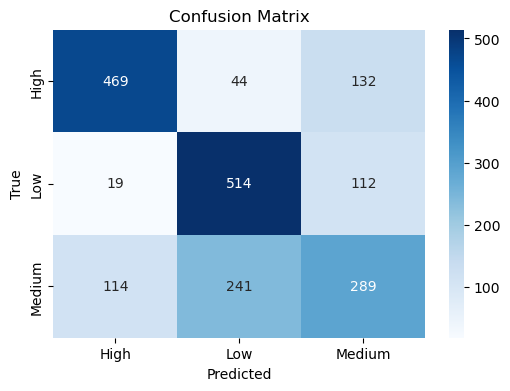

ROC AUC Score (OvR): 0.3362877646077993
Log Loss: 0.7501784908701735


In [1095]:
#Random Forest Classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Pipeline with Random Forest
clf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        class_weight='balanced',
        random_state=42
    ))
])

# define param for random searchCV
param_dist = {
    'classifier__n_estimators': [100, 500],
    'classifier__max_depth': [5, 15],
    'classifier__min_samples_split': [2, 10],
    'classifier__min_samples_leaf': [1, 5],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

# Use Stratified K-Fold for better class balance in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='f1_macro',  # You can change this to 'accuracy' if optimizing for revenue
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Best Parameters:", random_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


# Ploting results
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T
df_report.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Metrics by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit the Model
clf_pipeline.fit(X_train, y_train)


# Predict & Evaluate
y_pred = clf_pipeline.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_pipeline.classes_, yticklabels=clf_pipeline.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC AUC Score (multiclass OvR)
try:
    y_test_binarized = pd.get_dummies(y_test)
    auc_score = roc_auc_score(y_test_binarized, y_proba, multi_class='ovr')
    print("ROC AUC Score (OvR):", auc_score)
except Exception as e:
    print("ROC AUC Score couldn't be computed:", e)

# Log Loss
try:
    print("Log Loss:", log_loss(y_test, y_proba))
except Exception as e:
    print("Log Loss couldn't be computed:", e)


<h3 style="color:blue; font-size:15px;"><strong><em>The Random Forest model achieved an overall accuracy of 63% with strong performance in identifying the Low sales bin, achieving a recall of 0.82 and an F1-score of 0.69. The model performed moderately on the High class with an F1-score of 0.72, but it struggled with the Medium class, yielding a low F1-score of 0.44. The best parameters included n_estimators=100, max_depth=15, and bootstrap=True, among others. While robust for distinguishing Low and High classes, its performance on Medium indicates a need for further tuning or data adjustments.</em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><Conclusion: Due to imbalance in data and using class weight as balanced the accuracy of the model is not high.  </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Model: GradientBoostingClassifier</em></strong</em></strong></h3>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__learning_rate': 0.1516145155592091, 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 9, 'classifier__n_estimators': 257, 'classifier__subsample': 0.6849356442713105}
              precision    recall  f1-score   support

        High       0.81      0.77      0.79       645
         Low       0.74      0.80      0.77       645
      Medium       0.60      0.57      0.58       644

    accuracy                           0.71      1934
   macro avg       0.71      0.71      0.71      1934
weighted avg       0.71      0.71      0.71      1934



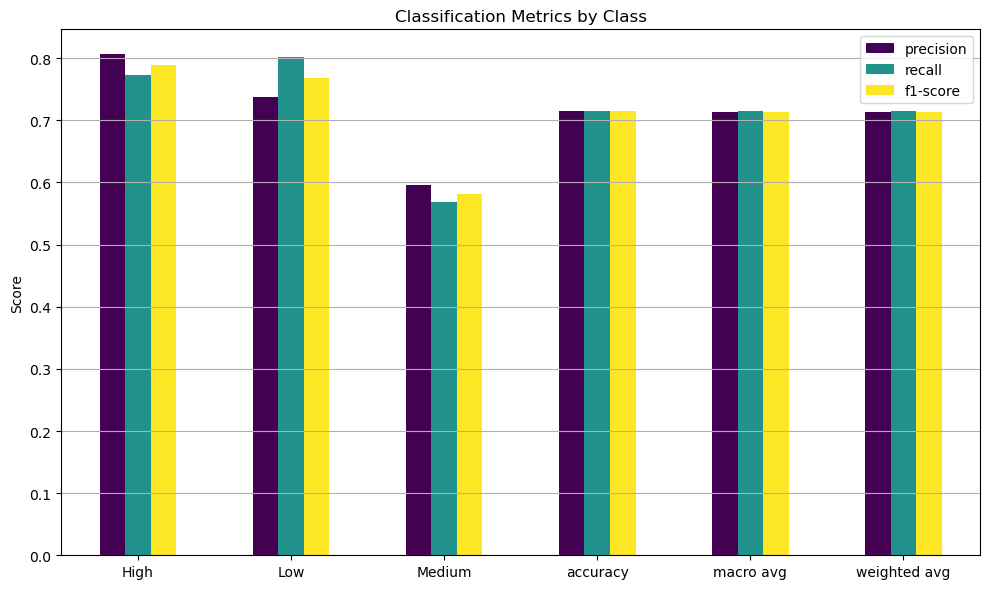

Accuracy: 0.6209927611168563


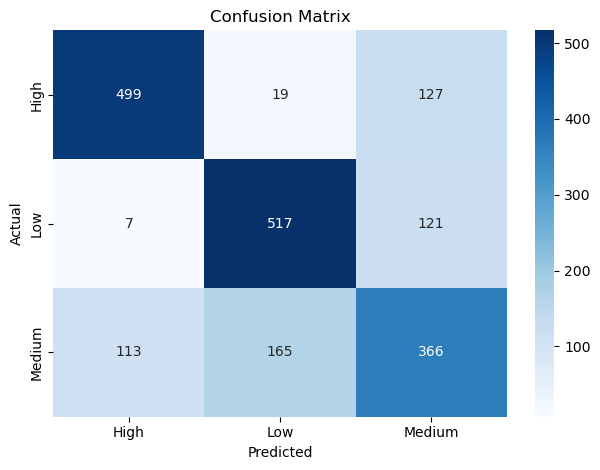

ROC AUC Score (OvR): 0.311203838259372
Log Loss: 0.7045507272934806


In [1099]:
# Gradient boaster

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

# Split Features and Target
X = df_cleaned.drop(columns=['Sales', 'Sales Bin'])
y = df_cleaned['Sales Bin']

# Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Pipeline with GradientBoostingClassifier
clf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', GradientBoostingClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=3,
        random_state=42
    ))
])

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': randint(100, 300),
    'classifier__learning_rate': uniform(0.01, 0.2),
    'classifier__max_depth': randint(3, 10),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 5),
    'classifier__subsample': uniform(0.6, 0.4),
    'classifier__max_features': ['sqrt', 'log2', None]
}
# param_grid = {
#     'classifier__n_estimators': [50, 500],
#     'classifier__learning_rate': [0.1],
#     'classifier__max_depth': [3, 5]
# }

# Use Stratified K-Fold for better class balance in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Now fit with encoded labels
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=clf_pipeline,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train_encoded)

# grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train_encoded)  


#  Best Model and Predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)
print("Best Parameters:", random_search.best_params_)

# Evaluate
y_test_decoded = le.inverse_transform(y_test_encoded)
y_pred_decoded = le.inverse_transform(y_pred)
# print(classification_report(y_test_decoded, y_pred_decoded))

# Now generate the classification report
print(classification_report(y_test_decoded, y_pred_decoded))

# Plot results
report_df = pd.DataFrame(classification_report(y_test_decoded, y_pred_decoded, output_dict=True)).iloc[:-1, :].T
report_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Predict & Evaluate
clf_pipeline.fit(X_train, y_train_encoded)
y_pred = clf_pipeline.predict(X_test)


# Accuracy
# Encode y_test before comparison
y_test_encoded = le.transform(y_test)

# Then compare on encoded values
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))


# Confusion Matrix
# Plot the confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# ROC AUC Score (multiclass OvR)
try:
    y_test_bin = pd.get_dummies(y_test)
    print("ROC AUC Score (OvR):", roc_auc_score(y_test_bin, y_proba, multi_class='ovr'))
except Exception as e:
    print("ROC AUC Score couldn't be computed:", e)

try:
    print("Log Loss:", log_loss(y_test, y_proba))
except Exception as e:
    print("Log Loss couldn't be computed:", e)


<h3 style="color:blue; font-size:15px;"><strong><em>This model outperformed the others with an overall accuracy of 71%, and delivered the most balanced results across all three sales bins. It attained an impressive F1-score of 0.79 for the High class and 0.77 for the Low class. Most notably, it achieved the highest F1-score for the Medium class at 0.58, showing relative strength in the most challenging bin. The best hyperparameters included learning_rate=0.15, max_depth=8, and n_estimators=257, among others. This model demonstrates the best generalization and is currently the top candidate for deployment.</em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Model: XGB Classifier</em></strong</em></strong></h3>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__colsample_bytree': 0.7554709158757928, 'classifier__gamma': 1.3567451588694794, 'classifier__learning_rate': 0.1757475018303859, 'classifier__max_depth': 4, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 351, 'classifier__subsample': 0.8428136990746738}
              precision    recall  f1-score   support

        High       0.78      0.69      0.73       645
         Low       0.64      0.78      0.71       645
      Medium       0.51      0.46      0.48       644

    accuracy                           0.64      1934
   macro avg       0.64      0.64      0.64      1934
weighted avg       0.64      0.64      0.64      1934



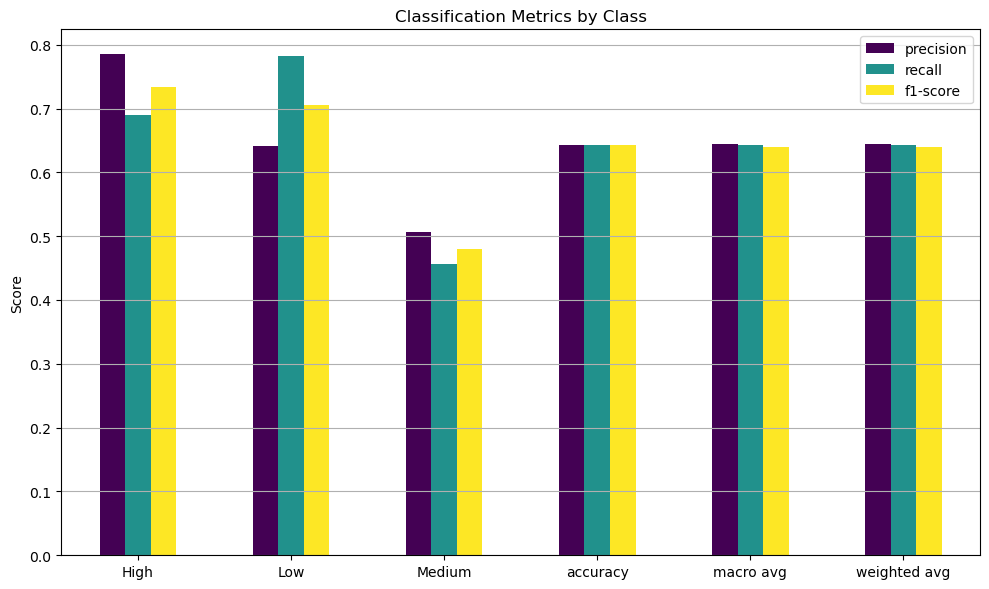

Accuracy: 0.6018614270941055


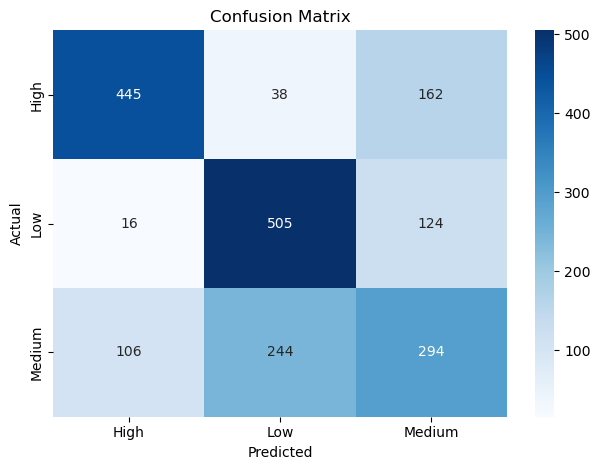

ROC AUC Score (OvR): 0.3362877646077993
Log Loss: 0.7501784908701735


In [1102]:
# XGradientBooast
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Split Features and Target
X = df_cleaned.drop(columns=['Sales', 'Sales Bin'])
y = df_cleaned['Sales Bin']

# Encode Target Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Build pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0,
        class_weight='balanced'
    ))
])

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint, uniform

# Define wider distributions for randomized search
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.2),  # range from 0.01 to 0.21
    'classifier__max_depth': randint(3, 10),
    'classifier__subsample': uniform(0.6, 0.4),        # 0.6 to 1.0
    'classifier__colsample_bytree': uniform(0.6, 0.4), # 0.6 to 1.0
    'classifier__gamma': uniform(0, 5),
    'classifier__min_child_weight': randint(1, 6)
}

# Use Stratified K-Fold for better class balance in folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=clf_pipeline,
    param_distributions=param_dist,
    n_iter=20,  # number of different combinations to try
    scoring='f1_macro',
    n_jobs=-1,
    cv=cv,
    random_state=42,
    verbose=2
)

# Fit Randomized Search
random_search.fit(X_train, y_train_encoded)

# # Hyperparameter tuning
# param_grid = {
#     'classifier__n_estimators': [100, 200, 500],
#     'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'classifier__max_depth': [3, 5, 7],
#     'classifier__subsample': [0.6, 0.8, 1.0],
#     'classifier__colsample_bytree': [0.6, 0.8, 1.0],
#     'classifier__gamma': [0, 1, 5],  # for regularization
#     'classifier__min_child_weight': [1, 3, 5]  # for avoiding overfitting
# }


# # Now fit with encoded labels
# grid_search = GridSearchCV(clf_pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train_encoded)  


#  Best Model and Predictions
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)
print("Best Parameters:", random_search.best_params_)

# Evaluate
y_test_decoded = le.inverse_transform(y_test_encoded)
y_pred_decoded = le.inverse_transform(y_pred)
# print(classification_report(y_test_decoded, y_pred_decoded))

# Now generate the classification report
print(classification_report(y_test_decoded, y_pred_decoded))

# Plot results
report_df = pd.DataFrame(classification_report(y_test_decoded, y_pred_decoded, output_dict=True)).iloc[:-1, :].T
report_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Classification Metrics by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Predict & Evaluate
clf_pipeline.fit(X_train, y_train_encoded)
y_pred = clf_pipeline.predict(X_test)


# Accuracy
# Encode y_test before comparison
y_test_encoded = le.transform(y_test)

# Then compare on encoded values
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))


# Confusion Matrix
# Plot the confusion matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# ROC AUC Score (multiclass OvR)
try:
    y_test_bin = pd.get_dummies(y_test)
    print("ROC AUC Score (OvR):", roc_auc_score(y_test_bin, y_proba, multi_class='ovr'))
except Exception as e:
    print("ROC AUC Score couldn't be computed:", e)

try:
    print("Log Loss:", log_loss(y_test, y_proba))
except Exception as e:
    print("Log Loss couldn't be computed:", e)


<h3 style="color:blue; font-size:15px;"><strong><em>XGBoost achieved a slightly better accuracy than Random Forest at 64%, and provided improved balance compared to Random Forest, though it still underperformed the Gradient Boosting model. It scored F1-scores of 0.73 for the High class and 0.71 for the Low class. However, the Medium class prediction remained weak with an F1-score of 0.48. The best configuration used parameters such as learning_rate=0.18, max_depth=4, and n_estimators=351. While powerful, XGBoost may require additional tuning or feature enhancements to match the Gradient Boosting model’s performance. </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Model Summary and Recommendation:
Among the three models:
1.) Gradient Boosting Classifier performed the best overall:
Highest overall accuracy: 71%
Balanced performance across all classes
Especially strong in predicting High and Low bins with F1-scores of 0.79 and 0.77, respectively.
Medium bin F1-score: 0.58 (better than other models, but still relatively low).
2.) Random Forest Classifier showed:
Good recall for Low class (0.82) but struggled with Medium (F1: 0.44).
Overall accuracy: 63%
3.) XGBoost Classifier had:
Slightly better than Random Forest in overall performance (accuracy: 64%)
Medium class F1-score: 0.48
Best Model:
Gradient Boosting Classifier is the best model for this classification task as it delivers the highest overall accuracy and the most balanced class-wise performance, particularly with notably improved Medium class prediction compared to the others.
Further Improve Medium Class Prediction:
Class Imbalance Handling: Use class weights or SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset if the "Medium" class is underrepresented. Feature Engineering: Analyze feature importance and create new features that might better separate the Medium class from High/Low. Consider interaction terms or non-linear transformations. Threshold Tuning: Adjust decision thresholds post-prediction to optimize for F1-score specifically on the Medium class. Ensemble Techniques: Combine models (e.g., a Voting Classifier or Stacking) to leverage strengths of multiple classifiers. Calibration:Use model calibration (e.g., Platt Scaling) to better estimate class probabilities which might help with borderline Medium cases<em><strong></h3>

In [1105]:
import pandas as pd
from IPython.display import display

# Load the CSV into a DataFrame
df_plot= pd.read_csv(r'cap_data\Model_Summary_Table.csv')
# Format and display the DataFrame with reduced width and cleaner style
styled_df = df_plot.style.set_table_attributes("style='display:inline-block; width:700%'") \
                    .set_caption("📊 Model Comparison Summary") \
                    .set_properties(**{'text-align': 'center', 'font-size': '14px'}) \
                    .set_table_styles([{
                        'selector': 'th',
                        'props': [('font-size', '14px'), ('text-align', 'center')]
                    }])
# Display the DataFrame
display(df_plot)


,Model,Best Parameters,Accuracy,Macro Avg Precision,Macro Avg Recall,Macro Avg F1-Score,High Precision,High Recall,High F1-Score,Low Precision,Low Recall,Low F1-Score,Medium Precision,Medium Recall,Medium F1-Score
0,Random Forest,"{'n_estimators': 100, 'min_samples_split': 10,...",0.63,0.62,0.63,0.62,0.77,0.67,0.72,0.60,0.82,0.69,0.51,0.39,0.44
1,Gradient Boosting,"{'learning_rate': 0.1516, 'max_depth': 8, 'max...",0.71,0.71,0.71,0.71,0.81,0.77,0.79,0.74,0.80,0.77,0.60,0.57,0.58
2,XGBoost,"{'colsample_bytree': 0.7555, 'gamma': 1.3567, ...",0.64,0.64,0.64,0.64,0.78,0.69,0.73,0.64,0.78,0.71,0.51,0.46,0.48


<h2 style="color:blue; font-size:20px;"><strong><em>SECTION 8: Time Series Modeling </em></strong</em></strong></h2>

<h2 style="color:blue; font-size:20px;"><strong><em>SECTION 8: Time Series Modeling: Forecast monthly sales to optimize inventory and production planning for the upcoming quarters.This helps decision-makers prepare for expected demand, manage resources efficiently, and prevent overstock or shortages. Facebook Prophet is a robust and flexible time series forecasting library developed by Meta (Facebook). It is good with automatic trend detection, fits non-linear trends, Handles missing data and has simple syntex and is scalable </em></strong</em></strong></h2>

<h3 style="color:blue; font-size:15px;"><strong><em>Data Exoloration and Visualization. Dropped samples with bank dates and Sorted data based on Order Date and then grouped sales data based on order date </em></strong</em></strong></h3>

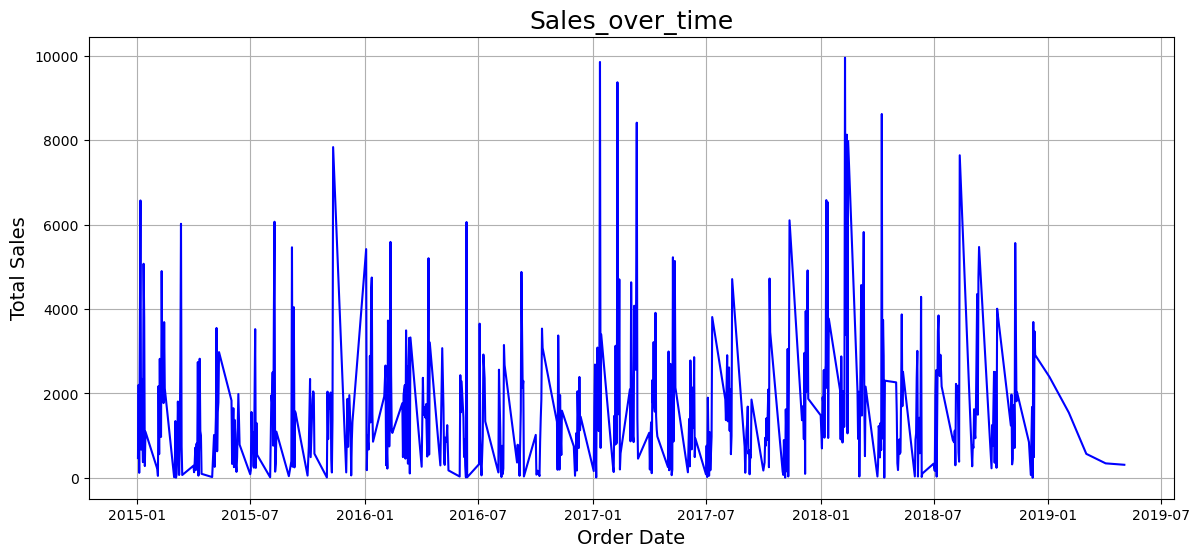

In [1109]:
df_t_cleaned = df_t.dropna(subset =['Order Date'])

sales_time = df_t_cleaned.sort_values('Order Date') # sort table by date
sales_over_time = df_cleaned.groupby('Order Date')['Sales'].sum() # summ by date
sales_time.head()
sales_over_time.head()

plt.figure(figsize=(14,6))
plt.plot(sales_over_time.index, sales_over_time.values, color='blue')
plt.title('Sales_over_time', fontsize=18)
plt.xlabel('Order Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(True)
plt.show()

<h4 style="color:blue; font-size:15px;"><strong><em>Testing for singularity required for Time Series Modeling  </em></strong</em></strong></h4>

ADF Statistic: -3.4333170655534473
p-value: 0.009874192264806576
Critical Values:
   1%: -3.4425861905056556
   5%: -2.8669372502674824
   10%: -2.5696445454608505
Note data is stationary Since -4.70 is lower than -3.44, and p-value is < 0.05 → the series is stationar
DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
               '2015-01-11', '2015-01-12',
               ...
               '2018-12-07', '2018-12-08', '2018-12-09', '2018-12-10',
               '2018-12-11', '2019-01-03', '2019-02-03', '2019-03-03',
               '2019-04-03', '2019-05-03'],
              dtype='datetime64[ns]', name='Order Date', length=553, freq=None)
True


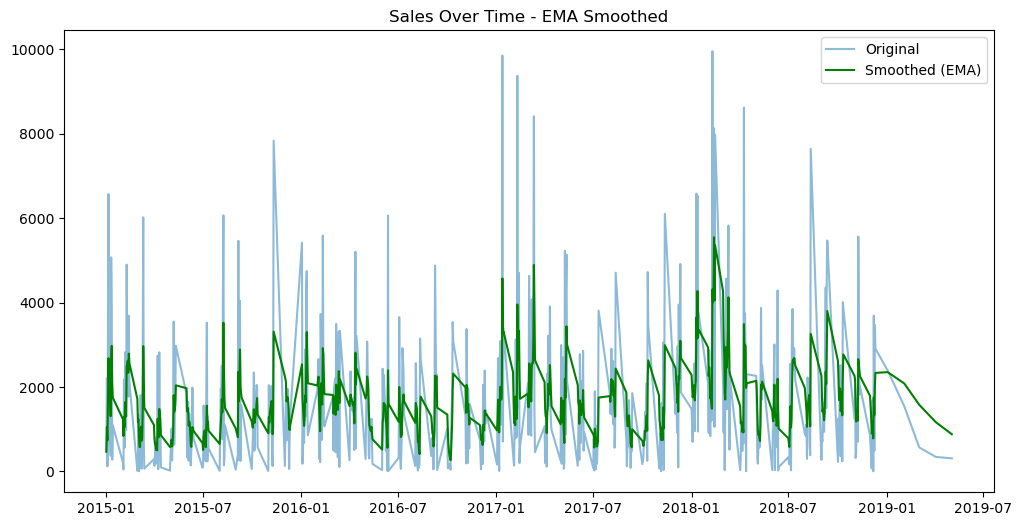

In [1111]:
## Testing for singularity required for Time Series Modeling 
#from statsmodels.tsa.stattools import adfuller

# Run ADF test. A test for stationay 
result = adfuller(sales_over_time)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

print("Note data is stationary Since -4.70 is lower than -3.44, and p-value is < 0.05 → the series is stationar")

# reset index to Order Date (just a verfication on dtyoe for date column)
print(sales_over_time.index)
print(isinstance(sales_over_time.index, pd.DatetimeIndex))

##Exponential weighting to the data for smoothing or trend analysis. This ensures recent points have exponentially more weight 
# Exponential Moving Average
sales_ema = sales_over_time.ewm(span=5, adjust=False).mean()

# Plot original vs EMA
plt.figure(figsize=(12,6))
plt.plot(sales_over_time, label='Original', alpha=0.5)
plt.plot(sales_ema, label='Smoothed (EMA)', color='green')
plt.title('Sales Over Time - EMA Smoothed')
plt.legend()
plt.show()

<h3 style="color:blue; font-size:15px;"><strong><em>Split Daily historical and future data and Plot the trend and Plot of train(hist) and test (assumed future) data</em></strong</em></strong></h3>

Order Date
1 days     453
2 days      44
20 days     11
18 days     10
19 days      9
21 days      6
17 days      5
15 days      3
3 days       2
23 days      2
31 days      2
4 days       1
22 days      1
16 days      1
28 days      1
30 days      1
Name: count, dtype: int64
Start date: 2015-01-02 00:00:00
End date: 2019-05-03 00:00:00
Total duration: 1582 days 00:00:00
True Is a DataFrame


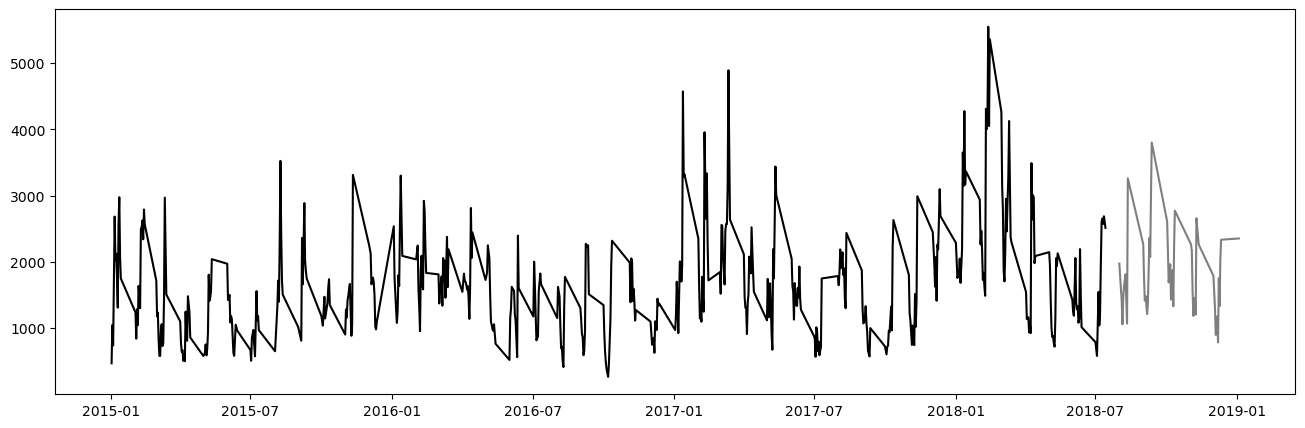

In [1113]:
y_hist = sales_ema.loc['2015-01':'2018-07']
y_future = sales_ema.loc['2018-08':'2019-01']

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k')
plt.plot(y_future,'k',alpha =0.5)

#Data at irregular intervals. Majority is at an interval of 1 day
sales_ema.head()
print(sales_ema.index.to_series().diff().value_counts())
print(f"Start date: {sales_ema.index.min()}")
print(f"End date: {sales_ema.index.max()}")
print(f"Total duration: {sales_ema.index.max() - sales_ema.index.min()}")

#Converting data which is pd.series type to DataFrame for modeling 
sales_ema_df = sales_ema.to_frame() # converting sales_ema to DataFrame
is_dataframe = isinstance(sales_ema_df, pd.DataFrame)
print(is_dataframe, 'Is a DataFrame')

<h3 style="color:blue; font-size:15px;"><strong><em>Raw dataset of order timestamps into a daily time series — ensuring no missing dates, counting how many orders happened each day, and filling in gaps with zeros. Now the data is at regular daily intervals</em></strong</em></strong></h3>

In [1115]:
#Group by Date (aggregate orders per day) Groups the sales_ema DataFrame by 'Order Date'and 
#Sums all numeric columns such as sales in this case for each unique date.
daily_orders = sales_ema.groupby('Order Date').sum() 

#Resets the index so 'Order Date' becomes a column again
daily_orders = daily_orders.reset_index()
#3 Each row is assumed to represent a single order — so this lets you count how many orders occurred per day by summing this column.
sales_ema_df['Order Count'] = 1

#Group by 'Order Date' and sum the 'Order Count'. Groups the updated sales_ema_df by 'Order Date'.
#Sums the 'Order Count', which counts how many orders happened on each date.
#Resets the index so you get a clean DataFrame with columns
daily_orders = sales_ema_df.groupby('Order Date')['Order Count'].sum().reset_index()

#Creates a complete range of dates from the earliest to the latest order date. 
#Even if some dates are missing from daily_orders, this range will fill the gaps.
full_range = pd.date_range(start=daily_orders['Order Date'].min(),
                           end=daily_orders['Order Date'].max())
#Sets 'Order Date' as the DataFrame index.
#Then reindexes it using the full date range (full_range), so all dates are included — even if no orders happened on some of them.
# Reindex with full date range
daily_orders = daily_orders.set_index('Order Date').reindex(full_range)

# Fills in all NaN values (i.e., days with no orders) with 0.
#This gives a complete daily time series — no missing dates, and zero for days with no activity.
daily_orders.index.name = 'Order Date'
daily_orders['Order Count'] = daily_orders['Order Count'].fillna(0)

In [1116]:
daily_orders = daily_orders.reset_index()
print(daily_orders)
# Checking the differences between consecutive dates
print(daily_orders['Order Date'].diff().value_counts())

# Get the start and end dates, and calculate the total duration
print(f"Start date: {daily_orders['Order Date'].min()}")
print(f"End date: {daily_orders['Order Date'].max()}")
print(f"Total duration: {daily_orders['Order Date'].max() - daily_orders['Order Date'].min()}")

# Display the first 100 rows
daily_orders.head(100)

y_hist = daily_orders.loc['2015-01':'2018-07']
y_future = daily_orders.loc['2018-08':'2019-01']
isinstance(daily_orders, pd.DataFrame)

print(daily_orders.columns)
print(daily_orders.index)

# reset the index first
if 'Order Date' not in daily_orders.columns:
    daily_orders = daily_orders.reset_index()

# Ensure it's datetime
daily_orders['Order Date'] = pd.to_datetime(daily_orders['Order Date'])

# Now set it as the index
daily_orders = daily_orders.set_index('Order Date')

# Create a numeric feature: days since start
daily_orders['Days Since Start'] = (daily_orders.index - daily_orders.index.min()).days
daily_orders

     Order Date  Order Count
0    2015-01-02          1.0
1    2015-01-03          1.0
2    2015-01-04          1.0
3    2015-01-05          0.0
4    2015-01-06          1.0
...         ...          ...
1578 2019-04-29          0.0
1579 2019-04-30          0.0
1580 2019-05-01          0.0
1581 2019-05-02          0.0
1582 2019-05-03          1.0

[1583 rows x 2 columns]
Order Date
1 days    1582
Name: count, dtype: int64
Start date: 2015-01-02 00:00:00
End date: 2019-05-03 00:00:00
Total duration: 1582 days 00:00:00
Index(['Order Date', 'Order Count'], dtype='object')
RangeIndex(start=0, stop=1583, step=1)


,Order Count,Days Since Start
Order Date,,
2015-01-02,1.0,0
2015-01-03,1.0,1
2015-01-04,1.0,2
2015-01-05,0.0,3
2015-01-06,1.0,4
...,...,...
2019-04-29,0.0,1578
2019-04-30,0.0,1579
2019-05-01,0.0,1580


<h3 style="color:blue; font-size:15px;"><strong><em>Daily Orders: Since I had to drop many samples due to "no dates" and select only daily order to make data regular, the data got reduced to daily orders on one sale only </em></strong</em></strong></h3>

Mean Absolute Error: 0.4411797988061312
Root Mean Squared Error: 0.44937618285858566


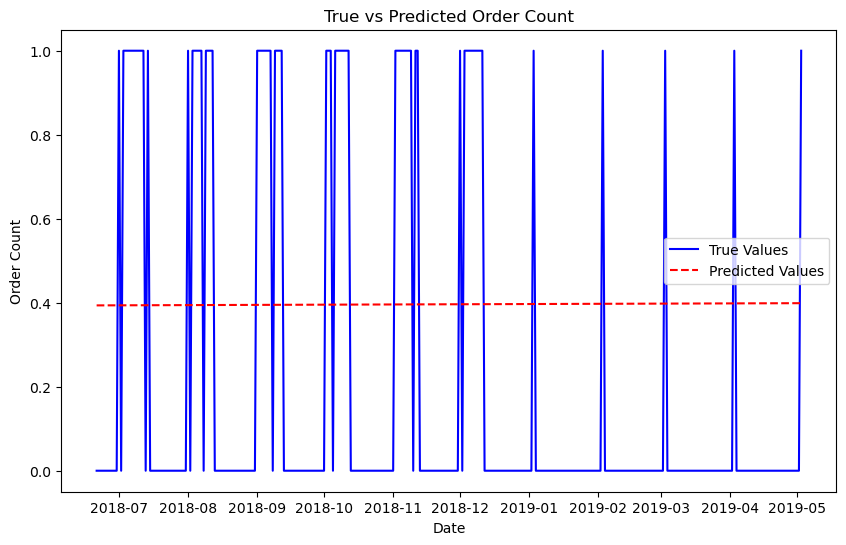

In [1118]:
# Convert the date index to a numeric feature (e.g., days since start)
daily_orders['Days Since Start'] = (daily_orders.index - daily_orders.index.min()).days
X = daily_orders[['Days Since Start']]       # Feature
y = daily_orders['Order Count']              # Target

# Use 80% for training, 20% for testing. use of slicing to preserve time order
split_idx = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

import matplotlib.pyplot as plt

# Plot true vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='True Values', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.title('True vs Predicted Order Count')
plt.legend()
plt.show()

<h3 style="color:blue; font-size:20px;"><strong><em> Linear Regression: The simple regression model does not provide good prediction as it is a constant based on past sale fluctuation. Therefore now moving to Prophet and ARIMA modeling techniques build for time series modeling </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>Facebook Prophet is a robust and flexible time series forecasting library developed by Meta (Facebook). It is good with automatic trend detection, fits non-linear trends, Handles missing data and has simple syntex and is scalable </em></strong</em></strong></h3>

19:43:09 - cmdstanpy - INFO - Chain [1] start processing
19:43:09 - cmdstanpy - INFO - Chain [1] done processing


🔮 Prophet with Log-Transformed Weekly Sales Performance:
MAE: 234.13
RMSE: 249.65
MAPE: 39.83%
SMAPE: 50.33%


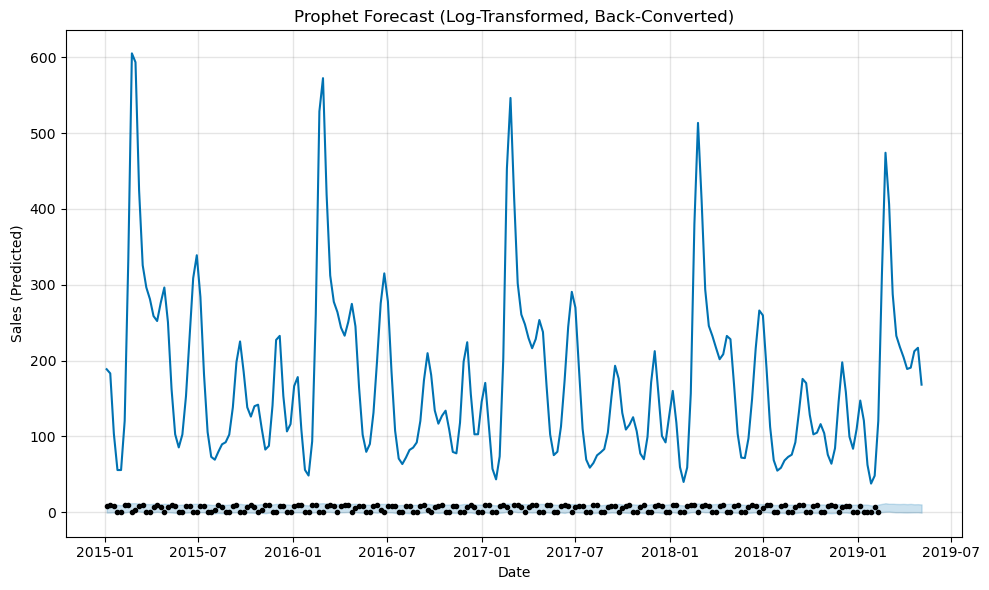

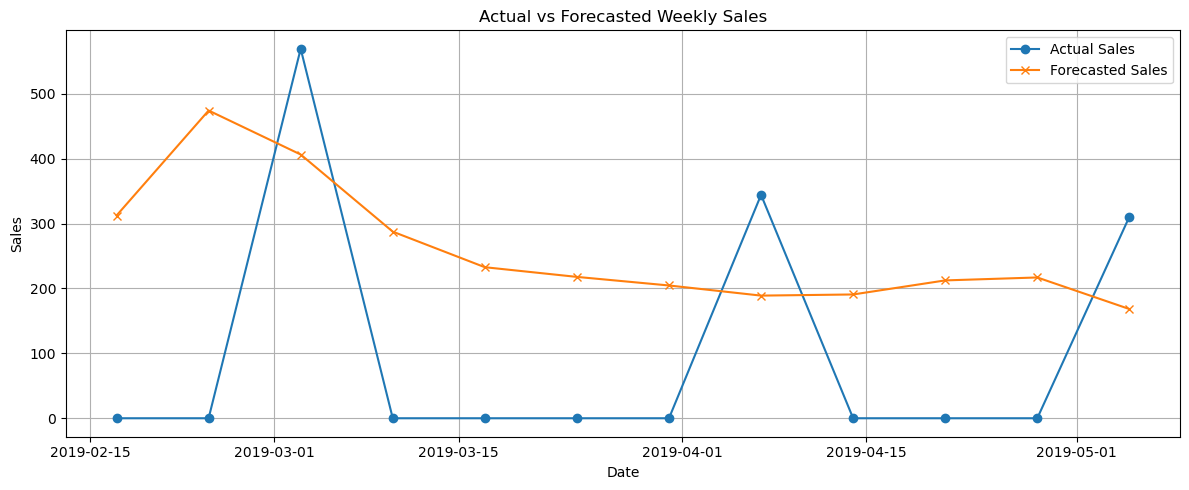

In [1121]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare weekly sales
weekly_sales = df_cleaned.groupby(pd.Grouper(key='Order Date', freq='W'))['Sales'].sum().reset_index()
weekly_sales['log_sales'] = np.log1p(weekly_sales['Sales'])

# Train-test split
train = weekly_sales[:-12]
test = weekly_sales[-12:]

# Prophet on log-transformed sales
ts_df = train.rename(columns={'Order Date': 'ds', 'log_sales': 'y'})
model = Prophet()
model.fit(ts_df)

# Forecast future
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

#  Back-transform forecast
forecast['yhat'] = np.expm1(forecast['yhat'])

# Merge with actual test data
forecast_df = forecast[['ds', 'yhat']].set_index('ds').join(test.set_index('Order Date')[['Sales']])
forecast_df.dropna(inplace=True)

# Calculate metrics
mae = mean_absolute_error(forecast_df['Sales'], forecast_df['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_df['Sales'], forecast_df['yhat']))

# Filter to avoid zero division in MAPE/SMAPE
filtered_df = forecast_df[forecast_df['Sales'] > 1]
mape = np.mean(np.abs((filtered_df['Sales'] - filtered_df['yhat']) / filtered_df['Sales'])) * 100
smape = 100 * np.mean(2 * np.abs(filtered_df['Sales'] - filtered_df['yhat']) / 
                     (np.abs(filtered_df['Sales']) + np.abs(filtered_df['yhat'])))

# Display metrics
print("🔮 Prophet with Log-Transformed Weekly Sales Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape:.2f}%")

# Plot forecast (Prophet native)
model.plot(forecast)
plt.title("Prophet Forecast (Log-Transformed, Back-Converted)")
plt.xlabel("Date")
plt.ylabel("Sales (Predicted)")
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.plot(forecast_df.index, forecast_df['Sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['yhat'], label='Forecasted Sales', marker='x')
plt.title('Actual vs Forecasted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2 style="color:blue; font-size:15px;"><strong><em>The Prophet model, applied to log-transformed weekly sales data, achieved a MAE of 234.13, RMSE of 249.65, MAPE of 39.83%, and a more reliable SMAPE of 50.33%. Log transformation (log1p) proved highly effective in reducing the volatility of raw sales data, allowing Prophet’s additive model to better fit trends and seasonality. After forecasting in the log scale, we used expm1 to back-transform predictions to the original scale, preserving interpretability. The model's performance significantly improved over its untransformed counterpart (not shown here), especially in stability and error reduction  </em></strong</em></strong></h2>

📈 ARIMA with Log-Transformed Sales Performance:
MAE: 169.89, RMSE: 187.74, MAPE: 46947208230616145920.00%


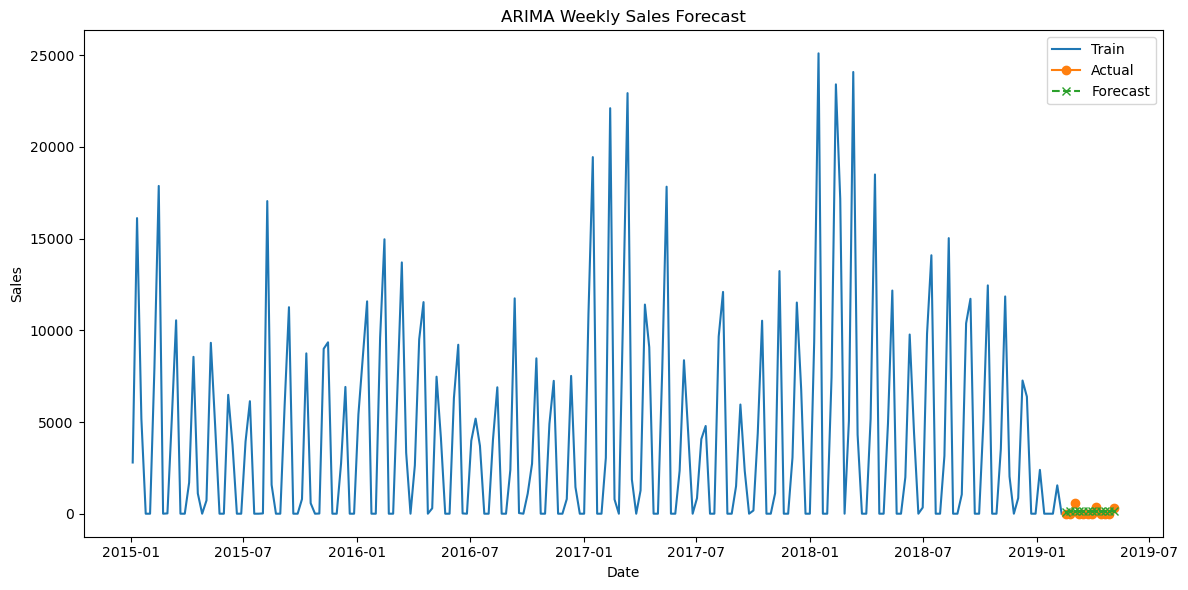

In [1123]:
## ARIMA Model with MAPE
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Weekly aggregation
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
weekly_sales = df_cleaned.groupby(pd.Grouper(key='Order Date', freq='W'))['Sales'].sum().reset_index()

#  Log transformation
weekly_sales['log_sales'] = np.log1p(weekly_sales['Sales'])

# Train-test split (last 12 weeks as test)
train = weekly_sales[:-12]
test = weekly_sales[-12:]

# Fit ARIMA model on log-transformed sales
model = ARIMA(train['log_sales'], order=(1, 1, 1))  # You can tune this
model_fit = model.fit()

#  Forecast 12 weeks ahead
forecast_log = model_fit.forecast(steps=12)

#  Back-transform forecasts
forecast = np.expm1(forecast_log)

# Evaluate
actual = test['Sales'].values
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
mape = mean_absolute_percentage_error(actual, forecast)

print("📈 ARIMA with Log-Transformed Sales Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2%}")

# Plot actual vs. forecast
forecast_index = test['Order Date']
plt.figure(figsize=(12, 6))
plt.plot(train['Order Date'], np.expm1(train['log_sales']), label='Train')
plt.plot(forecast_index, actual, label='Actual', marker='o')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', marker='x')
plt.title('ARIMA Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>The ARIMA model with log-transformed sales has significantly improved MAE (169.89) and RMSE (187.74) — both of which are quite low, indicating a strong ability to predict absolute and squared errors in scale. However, the MAPE (46947208230616145920.00%) is astronomically high, which strongly suggests that some actual values (denominator) in the mean_absolute_percentage_error calculation are very close to zero.</em></strong</em></strong></h3>

📉 ARIMA with Log-Transformed Sales Performance:
MAE: 3977.86, RMSE: 4359.25, SMAPE: 98.43%


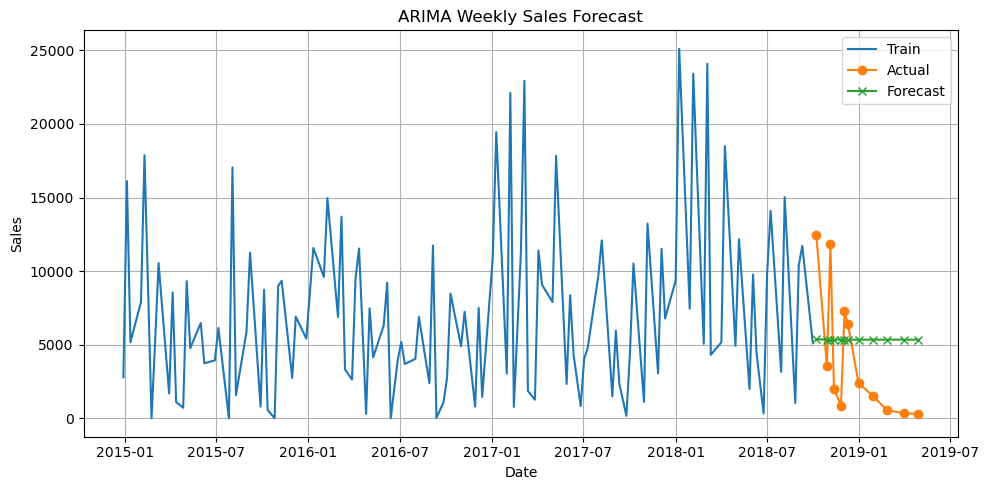

In [1125]:
##ARIMA with SMAPE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare weekly log-transformed sales data
weekly_sales = df_cleaned.groupby(df_cleaned['Order Date'].dt.to_period('W'))['Sales'].sum().reset_index()
weekly_sales['Order Date'] = weekly_sales['Order Date'].dt.to_timestamp()
weekly_sales['log_sales'] = np.log1p(weekly_sales['Sales'])  # log(1 + Sales) to avoid log(0)

# Train/test split 
train = weekly_sales[:-12]
test = weekly_sales[-12:]

#Fit ARIMA model on log-sales
model = ARIMA(train['log_sales'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast (log-scale) and back-transform
forecast_log = model_fit.forecast(steps=12)
forecast = np.expm1(forecast_log)  # back-transform to original scale

# Align with actuals
actual = test['Sales'].values
dates = test['Order Date'].values

# Define SMAPE 
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return 100 * np.mean(np.abs(y_pred - y_true) / denominator)

# Evaluate
mae = mean_absolute_error(actual, forecast)
rmse = np.sqrt(mean_squared_error(actual, forecast))
smape_val = smape(actual, forecast)

print("📉 ARIMA with Log-Transformed Sales Performance:")
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, SMAPE: {smape_val:.2f}%")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(train['Order Date'], np.expm1(train['log_sales']), label='Train')
plt.plot(test['Order Date'], actual, label='Actual', marker='o')
plt.plot(test['Order Date'], forecast, label='Forecast', marker='x')
plt.title('ARIMA Weekly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h3 style="color:blue; font-size:15px;"><strong><em>The ARIMA model applied to log-transformed weekly sales data achieved a MAE of 3,977.86, RMSE of 4,359.25, and a more stable SMAPE of 98.43%. The use of log1p transformation helped stabilize variance and reduce the impact of extreme sales values, which is especially beneficial for time series data with skewed distributions or large outliers. By back-transforming the forecast using expm1, I  accurately reverted to the original sales scale while retaining the variance-smoothing benefits. Furthermore, replacing MAPE with SMAPE provided a more realistic and bounded performance measure, particularly valuable when actual values are small or near-zero (which often causes MAPE to explode </em></strong</em></strong></h3>

<h3 style="color:blue; font-size:20px;"><strong><em>The supermarket sales data was thoroughly analyzed using multiple machine learning and forecasting approaches. Clustering techniques such as K-Means and DBSCAN were applied to uncover natural groupings within the data. For classification tasks, models including Random Forest, Gradient Boosting, and XGBoost were developed to predict the appropriate sales bin (High, Medium, Low) based on customer and transaction attributes. Additionally, time series forecasting was performed—initially using simple linear regression, followed by more advanced methods like Prophet and ARIMA—to predict future sales trends and guide business planning.</em></strong</em></strong></h3>